In [ ]:
import pandas as pd
import ast
import io
from google.colab import files

In [ ]:
def analyze_mcq_accuracy(df, audio_type):
    """
    Analyzes the MCQ accuracy for each question index.

    Args:
        df (pd.DataFrame): The DataFrame containing survey data.
                           Must have 'mcq_answers' and 'mcq_correct_answers' columns.
    """
    if 'mcq_answers' not in df.columns or 'mcq_correct_answers' not in df.columns:
        print("Error: DataFrame must include 'mcq_answers' and 'mcq_correct_answers' columns.")
        return

    # Initialize counters for each question
    # We first need to determine the number of questions by checking the length
    # of the first valid list.


    # [total_attempts, correct_answers]
    question_stats = [[0, 0] for _ in range(2)]

    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        try:
            # Safely parse the string representations of lists
            answers = ast.literal_eval(row['mcq_answers'])
            correct_key = ast.literal_eval(row['mcq_correct_answers'])

            # Ensure they are lists and have the expected length
            if not (isinstance(answers, list) and
                    isinstance(correct_key, list)):
                print(f"Skipping row {index}: Data format mismatch.")
                continue
            if row['audio_type_assigned'] != audio_type:
                continue

            # Compare answers for each question index
            for i in range(2):
                correct_answer = correct_key[i]
                user_answer = answers[i]

                # We only score questions where a correct answer is specified (not None)
                if correct_answer is not None:
                    # This is a scorable question
                    question_stats[i][0] += 1  # Increment total attempts

                    # Check if the user's answer matches the correct answer
                    if user_answer == correct_answer:
                        question_stats[i][1] += 1  # Increment correct count

        except (ValueError, SyntaxError) as e:
            print(f"Skipping row {index}: Error parsing data - {e}")
            continue

    # Calculate and print the results
    print(f"\n--- MCQ Accuracy Results for audio type {audio_type}---")
    total_correct = 0
    aggregate_attempts = 0
    for i in range(2):
        total_attempts = question_stats[i][0]
        correct_count = question_stats[i][1]

        total_correct += correct_count
        aggregate_attempts += total_attempts

        if total_attempts > 0:
            percentage = (correct_count / total_attempts) * 100
            print(f"Question {i+1} (index {i}): {percentage:.2f}% correct ({correct_count} / {total_attempts} scorable responses)")
        else:
            print(f"Question {i+1} (index {i}): No scorable responses found (Correct answer was always 'None').")
    total_percentage = (total_correct / aggregate_attempts) * 100
    print(f"Total accuracy: {total_percentage:.2f}%")

# --- Main script execution ---



In [ ]:
# 2. Read the CSV file into a pandas DataFrame
df = pd.read_csv("survey_data.csv")



In [ ]:
# 3. Run the analysis
analyze_mcq_accuracy(df, "balanced")
analyze_mcq_accuracy(df, "full")
analyze_mcq_accuracy(df, "muffled")



--- MCQ Accuracy Results for audio type balanced---
Question 1 (index 0): 88.57% correct (62 / 70 scorable responses)
Question 2 (index 1): 88.57% correct (62 / 70 scorable responses)
Total accuracy: 88.57%

--- MCQ Accuracy Results for audio type full---
Question 1 (index 0): 84.29% correct (59 / 70 scorable responses)
Question 2 (index 1): 77.14% correct (54 / 70 scorable responses)
Total accuracy: 80.71%

--- MCQ Accuracy Results for audio type muffled---
Question 1 (index 0): 87.14% correct (61 / 70 scorable responses)
Question 2 (index 1): 91.43% correct (64 / 70 scorable responses)
Total accuracy: 89.29%


Successfully loaded 'survey_data.csv'
Found audio types: ['balanced' 'full' 'muffled']

Processing audio type: balanced
Analyzing first 2 questions for balanced.

--- MCQ Accuracy Results for audio type: balanced (First 2 Questions) ---
Question 1 (index 0): 88.57% correct (62 / 70 scorable responses)
Question 2 (index 1): 88.57% correct (62 / 70 scorable responses)
Total accuracy (Q1 & Q2): 88.57% (124 / 140 total correct answers)

Processing audio type: full
Analyzing first 2 questions for full.

--- MCQ Accuracy Results for audio type: full (First 2 Questions) ---
Question 1 (index 0): 84.29% correct (59 / 70 scorable responses)
Question 2 (index 1): 77.14% correct (54 / 70 scorable responses)
Total accuracy (Q1 & Q2): 80.71% (113 / 140 total correct answers)

Processing audio type: muffled
Analyzing first 2 questions for muffled.

--- MCQ Accuracy Results for audio type: muffled (First 2 Questions) ---
Question 1 (index 0): 87.14% correct (61 / 70 scorable responses)
Question 2 (in

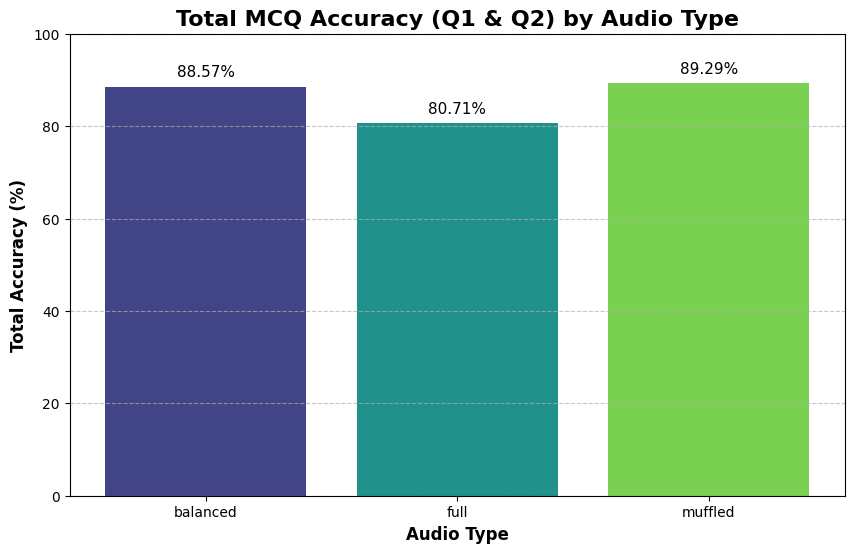

In [ ]:
import pandas as pd
import ast
import io
# from google.colab import files # No longer needed for direct reading
import matplotlib.pyplot as plt

def analyze_mcq_accuracy(df, audio_type):
    """
    Analyzes the MCQ accuracy for a given DataFrame subset (pre-filtered by audio type)
    for the first two questions ONLY (index 0 and 1).

    Args:
        df (pd.DataFrame): The DataFrame subset for a specific audio type.
        audio_type (str): The name of the audio type for printing results.

    Returns:
        float: The total accuracy percentage for this audio type (for Q1 and Q2).
    """
    if 'mcq_answers' not in df.columns or 'mcq_correct_answers' not in df.columns:
        print(f"Error for {audio_type}: DataFrame must include 'mcq_answers' and 'mcq_correct_answers' columns.")
        return 0.0

    # Hardcode to analyze only the first two questions
    num_questions = 2
    print(f"Analyzing first {num_questions} questions for {audio_type}.")

    question_stats = [[0, 0] for _ in range(num_questions)] # This will be [[0, 0], [0, 0]]
    total_scorable_answers = 0
    total_correct_answers = 0

    # Iterate over each row in the filtered DataFrame
    for index, row in df.iterrows():
        try:
            # Safely parse the string representations of lists
            answers = ast.literal_eval(row['mcq_answers'])
            correct_key = ast.literal_eval(row['mcq_correct_answers'])

            # Ensure they are lists and have at least 2 elements
            if not (isinstance(answers, list) and
                    isinstance(correct_key, list) and
                    len(answers) >= num_questions and
                    len(correct_key) >= num_questions):
                print(f"Skipping row {index} for {audio_type}: Data format mismatch or insufficient data for {num_questions} questions.")
                continue

            # Compare answers for the first two questions (index 0 and 1)
            for i in range(num_questions):
                correct_answer = correct_key[i]
                user_answer = answers[i]

                # We only score questions where a correct answer is specified (not None)
                if correct_answer is not None:
                    # This is a scorable question
                    question_stats[i][0] += 1  # Increment total attempts for this question
                    total_scorable_answers += 1 # Increment overall total attempts

                    # Check if the user's answer matches the correct answer
                    if user_answer == correct_answer:
                        question_stats[i][1] += 1  # Increment correct count for this question
                        total_correct_answers += 1 # Increment overall correct answers

        except (ValueError, SyntaxError) as e:
            print(f"Skipping row {index} for {audio_type}: Error parsing data - {e}")
            continue

    # --- Print results for this audio type ---
    print(f"\n--- MCQ Accuracy Results for audio type: {audio_type} (First {num_questions} Questions) ---")

    if total_scorable_answers == 0:
        print("No scorable responses found for this audio type.")
        return 0.0 # Return 0 accuracy

    # Print per-question results (for Q1 and Q2)
    for i in range(num_questions):
        total_attempts = question_stats[i][0]
        correct_count = question_stats[i][1]

        if total_attempts > 0:
            percentage = (correct_count / total_attempts) * 100
            print(f"Question {i+1} (index {i}): {percentage:.2f}% correct ({correct_count} / {total_attempts} scorable responses)")
        else:
            print(f"Question {i+1} (index {i}): No scorable responses found for this question.")

    # Calculate and print total accuracy for this audio type (Q1 and Q2 only)
    total_accuracy_percent = (total_correct_answers / total_scorable_answers) * 100
    print(f"Total accuracy (Q1 & Q2): {total_accuracy_percent:.2f}% ({total_correct_answers} / {total_scorable_answers} total correct answers)")

    # Return the total accuracy for plotting
    return total_accuracy_percent

def plot_accuracy_chart(accuracy_data):
    """
    Generates a bar chart from the accuracy data.

    Args:
        accuracy_data (dict): A dictionary with audio types as keys
                              and accuracy percentages as values.
    """
    if not accuracy_data:
        print("\nNo data to plot.")
        return

    audio_types = list(accuracy_data.keys())
    accuracies = list(accuracy_data.values())

    plt.figure(figsize=(10, 6))
    colors = plt.cm.viridis([0.2, 0.5, 0.8]) # Get some nice colors

    bars = plt.bar(audio_types, accuracies, color=colors)

    plt.xlabel('Audio Type', fontweight='bold', fontsize=12)
    plt.ylabel('Total Accuracy (%)', fontweight='bold', fontsize=12)
    plt.title('Total MCQ Accuracy (Q1 & Q2) by Audio Type', fontweight='bold', fontsize=16)
    plt.ylim(0, 100) # Accuracy is a percentage
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add percentage labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1.5, f'{yval:.2f}%',
                 ha='center', va='bottom', fontsize=11)

    print("\nDisplaying accuracy plot...")
    plt.show()

# --- Main script execution ---

# 1. Define the file name
file_name = "survey_data.csv" # Assuming the file is in the same directory

try:
    # 2. Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_name)
    print(f"Successfully loaded '{file_name}'")

    if 'audio_type_assigned' not in df.columns:
        print("Error: 'audio_type_assigned' column not found in CSV.")
    else:
        # 3. Find unique audio types (excluding calibration)
        # Make sure to filter out calibration rows if they exist
        if 'is_calibration' in df.columns:
            analysis_df = df[df['is_calibration'] == False].copy()
        else:
            analysis_df = df.copy()

        audio_types = analysis_df['audio_type_assigned'].unique()
        print(f"Found audio types: {audio_types}")

        total_accuracies = {}

        # 4. Run analysis for each audio type
        for audio_type in audio_types:
            if pd.isna(audio_type):
                continue # Skip any null/NaN audio types

            print(f"\nProcessing audio type: {audio_type}")
            # Filter the dataframe for the current audio type
            df_filtered = analysis_df[analysis_df['audio_type_assigned'] == audio_type]

            # Run analysis and store the returned total accuracy
            total_acc = analyze_mcq_accuracy(df_filtered, audio_type)
            total_accuracies[audio_type] = total_acc

        # 5. Plot the results
        plot_accuracy_chart(total_accuracies)

except FileNotFoundError:
    print(f"\nError: The file '{file_name}' was not found.")
    print("Please make sure 'survey_data.csv' is in the same directory as the script.")
except Exception as e:
    print(f"\nAn error occurred: {e}")

Running Likert Scale Statistical Analysis...

--- Analyzing: Mental Demand (likert_mental_demand) ---

[Descriptive Statistics]
                         mean       std  count
audio_type_assigned                           
full                 2.557143  1.162652     70
muffled              2.500000  1.017955     70
balanced             2.671429  1.059415     70

[Statistical Tests]
One-Way ANOVA results: F-statistic = 0.4558, p-value = 0.6346

ANOVA was not significant (p >= 0.05).
There is no statistically significant difference between the group means.

--- Analyzing: Tone Understanding (likert_tone_difficulty) ---

[Descriptive Statistics]
                         mean       std  count
audio_type_assigned                           
full                 2.728571  1.128311     70
muffled              2.542857  1.138085     70
balanced             2.714286  1.156492     70

[Statistical Tests]
One-Way ANOVA results: F-statistic = 0.5742, p-value = 0.5640

ANOVA was not significant (p >=

/tmp/ipython-input-2422768.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-2422768.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-2422768.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-2422768.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


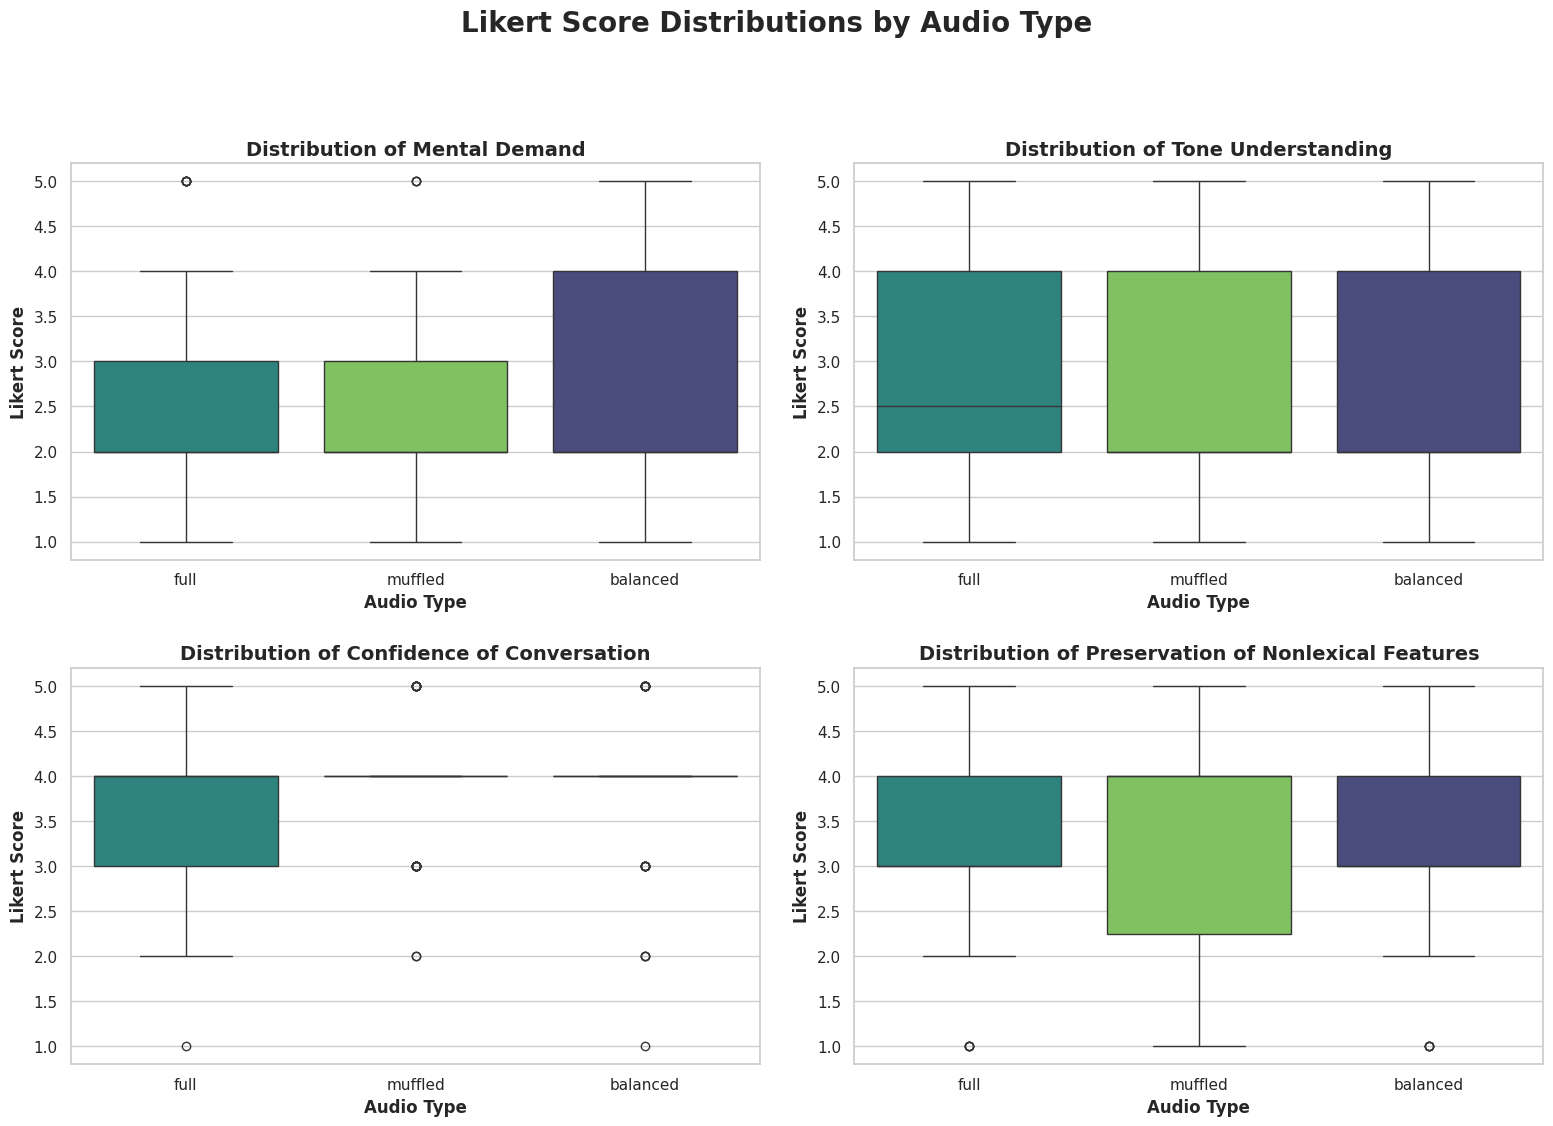


Generating Mean & Standard Deviation Plots...


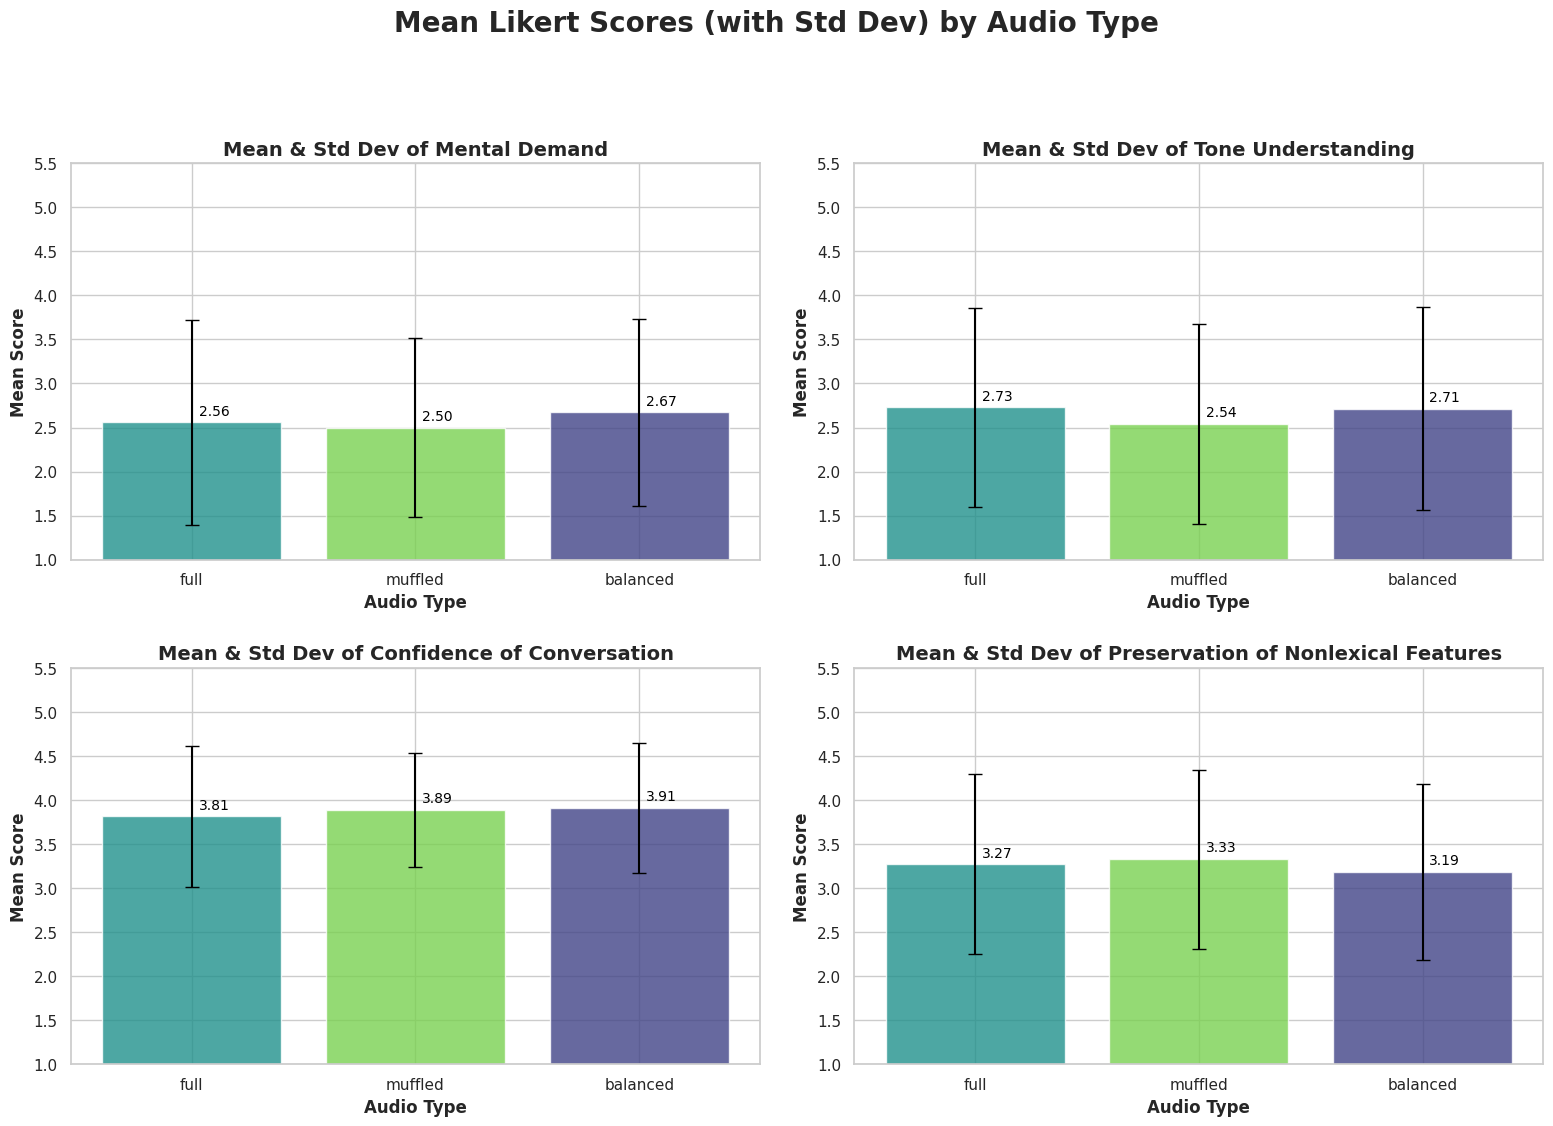


Generating Response Distribution Plots (Mode)...


/tmp/ipython-input-2422768.py:260: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_tick_labels, fontsize=10) # Added fontsize control
/tmp/ipython-input-2422768.py:260: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_tick_labels, fontsize=10) # Added fontsize control
/tmp/ipython-input-2422768.py:260: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_tick_labels, fontsize=10) # Added fontsize control
/tmp/ipython-input-2422768.py:260: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_tick_labels, fontsize=10) # Added fontsize control


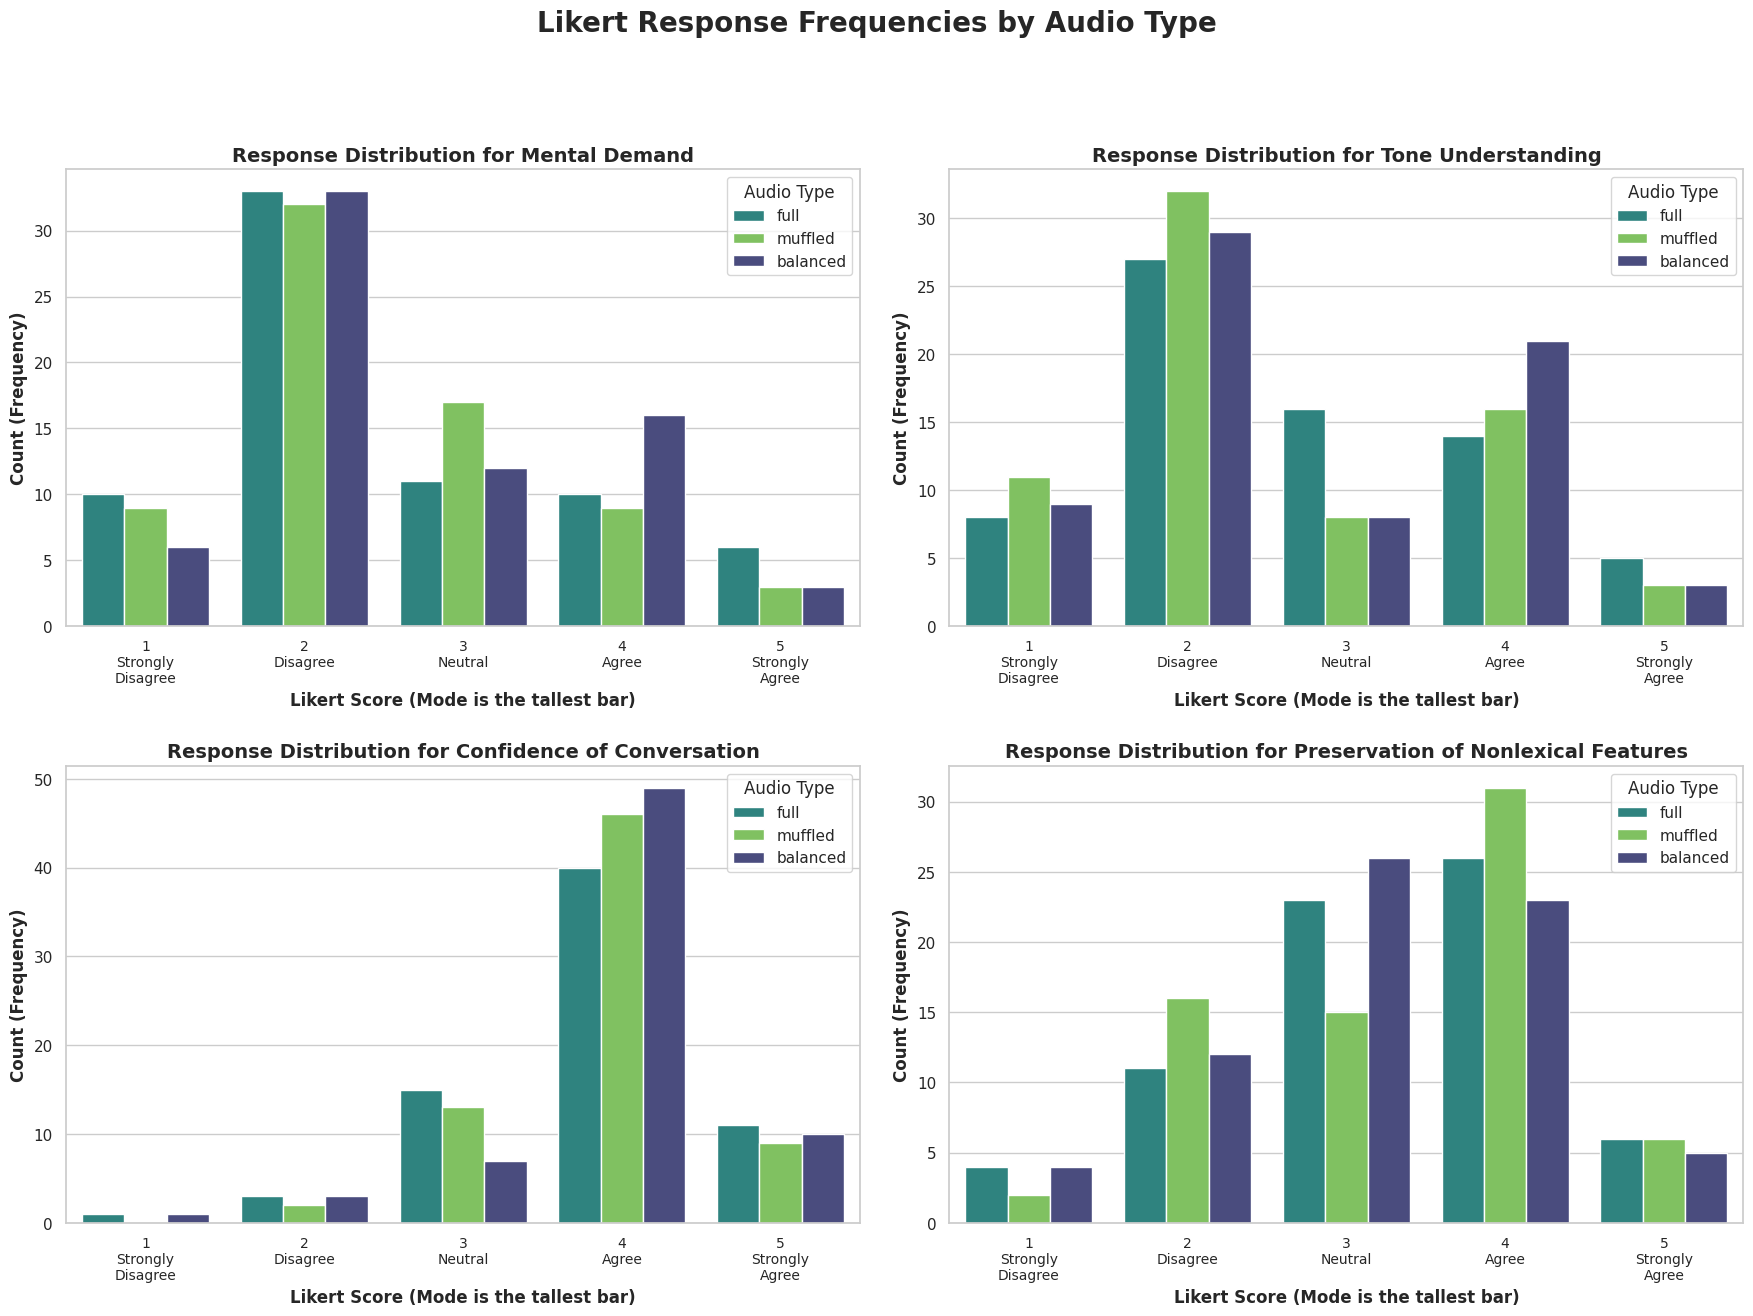


Likert scale analysis complete.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np

# --- Configuration ---

# List of the Likert scale columns to analyze
# Note: Using the names from the CSV: 'likert_mental_demand' and 'likert_tone_difficulty'
likert_columns_to_analyze = [
    'likert_mental_demand',
    'likert_tone_difficulty',
    'likert_confidence_conversation',
    'likert_nonlexical_preserved'
]
# --- MODIFIED: Set the desired order ---
audio_types = ['full', 'muffled', 'balanced']

# --- NEW: Friendly names for plots ---
likert_labels = {
    'likert_mental_demand': "Mental Demand",
    'likert_tone_difficulty': "Tone Understanding",
    'likert_confidence_conversation': "Confidence of Conversation",
    'likert_nonlexical_preserved': "Preservation of Nonlexical Features"
}

# --- NEW: Define colors for the new order ---
# full = 0.5, muffled = 0.8, balanced = 0.2
plot_colors = [plt.cm.viridis(0.5), plt.cm.viridis(0.8), plt.cm.viridis(0.2)]

# --- Statistical Analysis ---
print("="*60)
print("Running Likert Scale Statistical Analysis...")
print("="*60)

# We assume 'analysis_df' is already in memory from the previous cell.
# If not, you would uncomment the following lines:
# file_name = "survey_data.csv"
# df = pd.read_csv(file_name)
# analysis_df = df[df['is_calibration'] == False].copy()

# Caches to store data for plotting
desc_stats_cache = {}
anova_data_cache = {}

for likert_col in likert_columns_to_analyze:
    print(f"\n--- Analyzing: {likert_labels.get(likert_col, likert_col)} ({likert_col}) ---")

    # 1. Descriptive Statistics (Mean, Std)
    print("\n[Descriptive Statistics]")
    desc_stats = analysis_df.groupby('audio_type_assigned')[likert_col].agg(['mean', 'std', 'count'])
    print(desc_stats.loc[audio_types]) # Print in specified order
    desc_stats_cache[likert_col] = desc_stats

    # 2. Prepare data for ANOVA (by gathering scores for each group)
    print("\n[Statistical Tests]")
    # Get scores for each audio type, dropping any NaN values
    # --- MODIFIED: Get data in the new order ---
    data_full = analysis_df[analysis_df['audio_type_assigned'] == 'full'][likert_col].dropna()
    data_muffled = analysis_df[analysis_df['audio_type_assigned'] == 'muffled'][likert_col].dropna()
    data_balanced = analysis_df[analysis_df['audio_type_assigned'] == 'balanced'][likert_col].dropna()

    anova_data_cache[likert_col] = {
        'full': data_full,
        'muffled': data_muffled,
        'balanced': data_balanced
    }

    # 3. Perform One-Way ANOVA
    # Check if we have enough data in all groups
    if data_balanced.empty or data_full.empty or data_muffled.empty:
        print("Skipping ANOVA: One or more audio types have no data for this column.")
        continue

    f_stat, p_value = stats.f_oneway(data_full, data_muffled, data_balanced)
    print(f"One-Way ANOVA results: F-statistic = {f_stat:.4f}, p-value = {p_value:.4f}")

    # 4. Perform Tukey's HSD Post-Hoc Test (if ANOVA was significant)
    if p_value < 0.05:
        print("\n[Post-Hoc Test (Tukey's HSD)]")
        # We need to create one continuous list of all scores and a parallel list of group labels
        all_data = np.concatenate([data_full, data_muffled, data_balanced])
        labels = ['full'] * len(data_full) + ['muffled'] * len(data_muffled) + ['balanced'] * len(data_balanced)

        # Perform Tukey's HSD test
        tukey_result = pairwise_tukeyhsd(all_data, labels, alpha=0.05)

        print(tukey_result)
    else:
        print("\nANOVA was not significant (p >= 0.05).")
        print("There is no statistically significant difference between the group means.")

print("\n" + "="*60)
print("Generating Likert Scale Plots...")
print("="*60)

# --- Graphical Output (Box Plots) ---

# Set a nice style
sns.set(style="whitegrid", palette="viridis")
# Create a figure with 4 subplots (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# --- ADDED: Main Figure Title ---
fig.suptitle('Likert Score Distributions by Audio Type', fontsize=20, fontweight='bold')

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, likert_col in enumerate(likert_columns_to_analyze):
    ax = axes[i]

    # --- MODIFIED: Get friendly plot title ---
    plot_title = likert_labels.get(likert_col, likert_col) # Fallback to column name if not in map

    # Create the box plot
    sns.boxplot(
        x='audio_type_assigned',
        y=likert_col,
        data=analysis_df,
        order=audio_types,  # Use the specified order
        ax=ax,
        palette=plot_colors # --- MODIFIED ---
    )

    # Add a title to the subplot
    ax.set_title(f'Distribution of {plot_title}', fontweight='bold', fontsize=14) # --- MODIFIED ---
    ax.set_xlabel('Audio Type', fontweight='bold', fontsize=12)
    ax.set_ylabel('Likert Score', fontweight='bold', fontsize=12)

# Adjust layout to prevent plots from overlapping and make space for suptitle
plt.tight_layout(pad=2.0, rect=[0, 0.03, 1, 0.95])
# Show the plots
plt.show()


# --- NEW: Graphical Output (Mean & Std Dev Bar Plots) ---

print("\n" + "="*60)
print("Generating Mean & Standard Deviation Plots...")
print("="*60)

sns.set(style="whitegrid", palette="viridis")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# --- ADDED: Main Figure Title ---
fig.suptitle('Mean Likert Scores (with Std Dev) by Audio Type', fontsize=20, fontweight='bold')

# Get the color palette
colors = plot_colors # --- MODIFIED ---

for i, likert_col in enumerate(likert_columns_to_analyze):
    ax = axes[i]

    # --- MODIFIED: Get friendly plot title ---
    plot_title = likert_labels.get(likert_col, likert_col)

    # Get the pre-calculated stats
    stats_data = desc_stats_cache.get(likert_col)
    if stats_data is None:
        ax.set_title(f"{plot_title}\n(No data)") # --- MODIFIED ---
        continue

    # Re-order the stats data
    stats_data_ordered = stats_data.loc[audio_types]

    # Create the bar plot for the mean
    bars = ax.bar(
        stats_data_ordered.index,
        stats_data_ordered['mean'],
        yerr=stats_data_ordered['std'],  # Add standard deviation as error bars
        color=colors, # --- MODIFIED ---
        capsize=5,  # Add caps to the error bars
        alpha=0.8
    )

    # --- MODIFIED: Position text just above the bar AND to the right ---
    for bar in bars:
        yval = bar.get_height()

        # X position: center of the bar + a small rightward offset
        text_x_pos = bar.get_x() + bar.get_width() / 2.0 + 0.03

        # Y position: slightly above the bar's height
        text_y_pos = yval + 0.05

        ax.text(text_x_pos, text_y_pos, f'{yval:.2f}',
                 ha='left',  # Align text to the left, starting from text_x_pos
                 va='bottom',
                 fontsize=10,
                 color='black') # Ensure text is visible

    ax.set_title(f'Mean & Std Dev of {plot_title}', fontweight='bold', fontsize=14) # --- MODIFIED ---
    ax.set_xlabel('Audio Type', fontweight='bold', fontsize=12)
    ax.set_ylabel('Mean Score', fontweight='bold', fontsize=12)
    # Set Y-axis to start from 1 (Likert scale min)
    ax.set_ylim(bottom=1, top=max(5.5, (stats_data_ordered['mean'] + stats_data_ordered['std']).max() + 0.5))

plt.tight_layout(pad=2.0, rect=[0, 0.03, 1, 0.95])
plt.show()


# --- NEW: Graphical Output (Mode & Distribution Plots) ---

print("\n" + "="*60)
print("Generating Response Distribution Plots (Mode)...")
print("="*60)

sns.set(style="whitegrid", palette="viridis")
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = axes.flatten()

# --- ADDED: Main Figure Title ---
fig.suptitle('Likert Response Frequencies by Audio Type', fontsize=20, fontweight='bold')

for i, likert_col in enumerate(likert_columns_to_analyze):
    ax = axes[i]

    # --- MODIFIED: Get friendly plot title ---
    plot_title = likert_labels.get(likert_col, likert_col)

    # Create the count plot
    # We use hue to split by audio_type_assigned
    sns.countplot(
        x=likert_col,
        hue='audio_type_assigned',
        hue_order=audio_types,
        data=analysis_df,
        ax=ax,
        palette=plot_colors # --- MODIFIED ---
    )

    ax.set_title(f'Response Distribution for {plot_title}', fontweight='bold', fontsize=14) # --- MODIFIED ---
    ax.set_xlabel('Likert Score (Mode is the tallest bar)', fontweight='bold', fontsize=12)
    ax.set_ylabel('Count (Frequency)', fontweight='bold', fontsize=12)

    # --- NEW: Set custom x-tick labels ---
    # Create a mapping for the labels
    label_map = {
        '1': '1\nStrongly\nDisagree',
        '1.0': '1\nStrongly\nDisagree',
        '2': '2\nDisagree',
        '2.0': '2\nDisagree',
        '3': '3\nNeutral',
        '3.0': '3\nNeutral',
        '4': '4\nAgree',
        '4.0': '4\nAgree',
        '5': '5\nStrongly\nAgree',
        '5.0': '5\nStrongly\nAgree'
    }

    # Get the current tick labels (which are just numbers 1.0, 2.0, etc.)
    current_tick_texts = [label.get_text() for label in ax.get_xticklabels()]
    new_tick_labels = [label_map.get(text, text) for text in current_tick_texts]

    if new_tick_labels: # Only set if we have labels
        ax.set_xticklabels(new_tick_labels, fontsize=10) # Added fontsize control
    # --- End of new tick label code ---

    ax.legend(title='Audio Type')

plt.tight_layout(pad=2.0, rect=[0, 0.03, 1, 0.95])
plt.show()

print("\nLikert scale analysis complete.")

Running Overall Optimal Volume (%) Statistical Analysis...

[Overall Descriptive Statistics]
mean      40.214286
std       15.116669
count    210.000000
Name: optimal_volume_percent, dtype: float64

Generating Overall Optimal Volume (%) Plots...


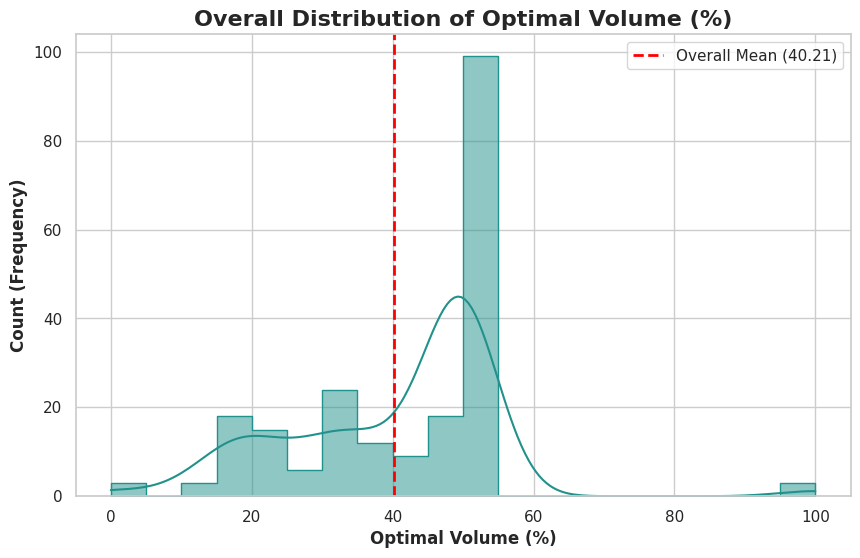

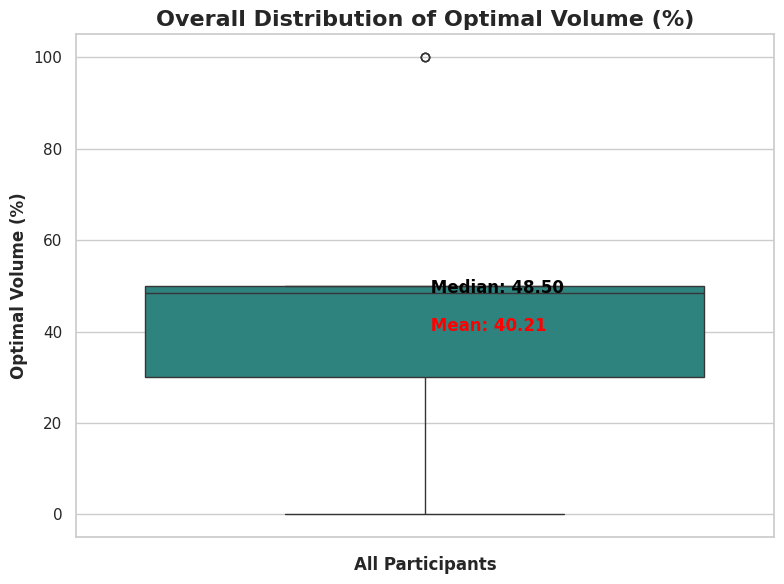


Optimal Volume (%) analysis complete.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# from statsmodels.stats.multicom import pairwise_tukeyhsd # No longer needed for this script
import numpy as np

# --- Configuration ---

# Column to analyze. Using 'optimal_volume_percent' for a 0-100 scale.
column_to_analyze = 'optimal_volume_percent'
plot_title_friendly = 'Optimal Volume (%)'
plot_color = plt.cm.viridis(0.5) # A single color for all plots

# --- Statistical Analysis (Overall) ---
print("="*60)
print(f"Running Overall {plot_title_friendly} Statistical Analysis...")
print("="*60)

# We assume 'analysis_df' is already in memory from the previous cell.
# (i.e., df[df['is_calibration'] == False])
# If not, you would uncomment the following lines:
# file_name = "survey_data.csv"
# df = pd.read_csv(file_name)
# analysis_df = df[df['is_calibration'] == False].copy()

# 1. Descriptive Statistics (Mean, Std) for the entire dataset
print("\n[Overall Descriptive Statistics]")
# Get all non-NaN data for the column
volume_data = analysis_df[column_to_analyze].dropna()

if volume_data.empty:
    print(f"No data found for column '{column_to_analyze}'.")
else:
    desc_stats = volume_data.agg(['mean', 'std', 'count'])
    print(desc_stats)

    print("\n" + "="*60)
    print(f"Generating Overall {plot_title_friendly} Plots...")
    print("="*60)

    # --- Graphical Output ---

    sns.set(style="whitegrid")

    # --- Plot 1: Distribution Plot (Histogram/KDE) ---
    plt.figure(figsize=(10, 6))

    # --- THIS IS THE FIX ---
    # Pass the Series `volume_data` directly to `x`, instead of using the `data` argument
    ax = sns.histplot(
        x=volume_data,
        color=plot_color,
        kde=True,
        element="step",
        bins=20 # 20 bins from 0 to 100
    )
    # --- END OF FIX ---

    # Add vertical line for the overall mean
    mean_val = desc_stats['mean']
    plt.axvline(
        mean_val,
        color='red', # Use a distinct color for the mean line
        linestyle='--',
        linewidth=2,
        label=f'Overall Mean ({mean_val:.2f})'
    )

    ax.set_title(f'Overall Distribution of {plot_title_friendly}', fontweight='bold', fontsize=16)
    ax.set_xlabel(f'{plot_title_friendly}', fontweight='bold', fontsize=12)
    ax.set_ylabel('Count (Frequency)', fontweight='bold', fontsize=12)
    ax.legend()
    plt.show()


    # --- Plot 2: Box Plot ---
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(
        y=volume_data, # Plot the data directly on the y-axis
        color=plot_color
    )

    ax.set_title(f'Overall Distribution of {plot_title_friendly}', fontweight='bold', fontsize=16)
    ax.set_xlabel('All Participants', fontweight='bold', fontsize=12) # Label for the single category
    ax.set_ylabel(f'{plot_title_friendly}', fontweight='bold', fontsize=12)

    # Add mean value text to the box plot as well
    median_val = volume_data.median()
    ax.text(0, median_val, f' Median: {median_val:.2f}',
             horizontalalignment='left', size='medium', color='black', weight='semibold')
    ax.text(0, mean_val, f' Mean: {mean_val:.2f}',
             horizontalalignment='left', size='medium', color='red', weight='semibold')


    plt.tight_layout()
    plt.show()

    print(f"\n{plot_title_friendly} analysis complete.")

Preparing data for 'Buying a Product'...
Found 42 rows for 'Buying a Product'.
Successfully created new columns: ['mcq_q3', 'mcq_q4', 'mcq_q5']
Proceeding with analysis on 42 valid rows.

Running Statistical Analysis...

--- Analyzing: confidence tone ---

[Descriptive Statistics]
                         mean       std  count
audio_type_assigned                           
full                 2.214286  0.801784     14
muffled              2.785714  0.425815     14
balanced             2.785714  1.121714     14

[Statistical Tests]
One-Way ANOVA results: F-statistic = 2.1953, p-value = 0.1249

ANOVA was not significant (p >= 0.05).

--- Analyzing: annoyance tone ---

[Descriptive Statistics]
                         mean       std  count
audio_type_assigned                           
full                 1.500000  1.224745     14
muffled              0.714286  0.994490     14
balanced             1.071429  1.384768     14

[Statistical Tests]
One-Way ANOVA results: F-statistic = 1.4751

/tmp/ipython-input-3453217779.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-3453217779.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-3453217779.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


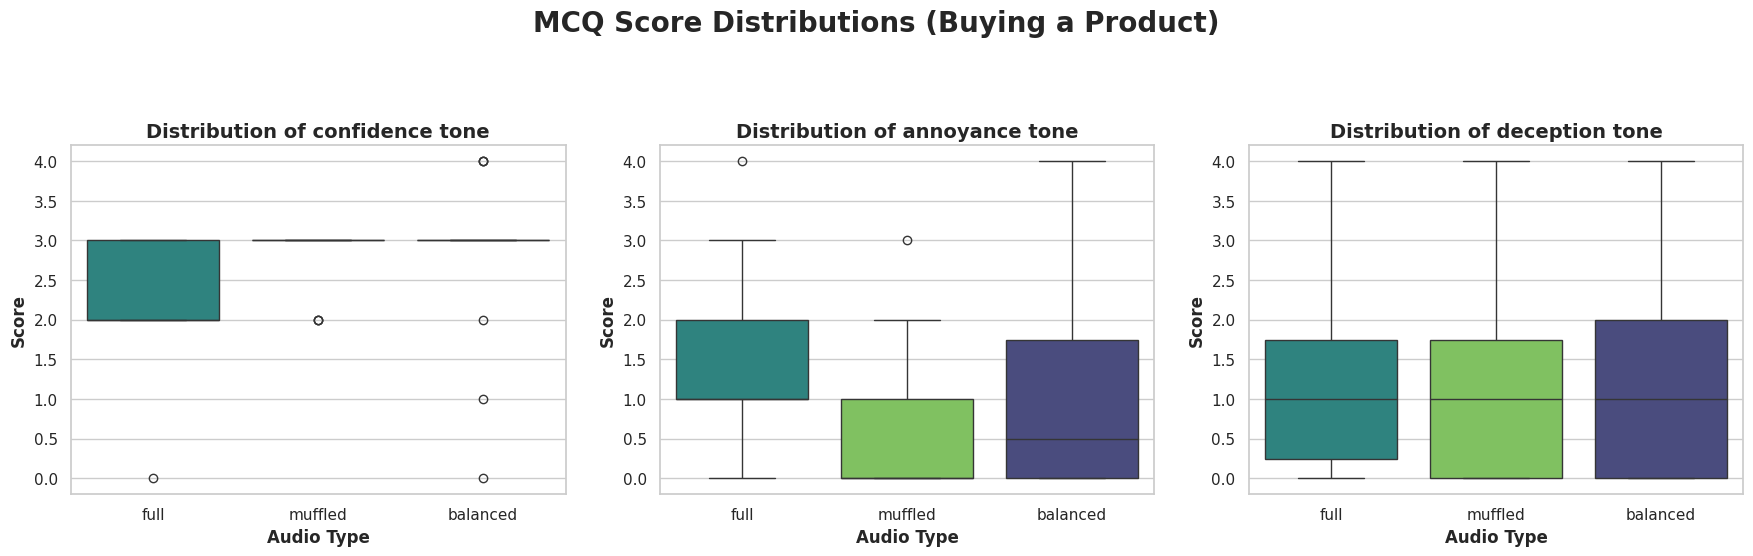


Generating Mean & Standard Deviation Plots...


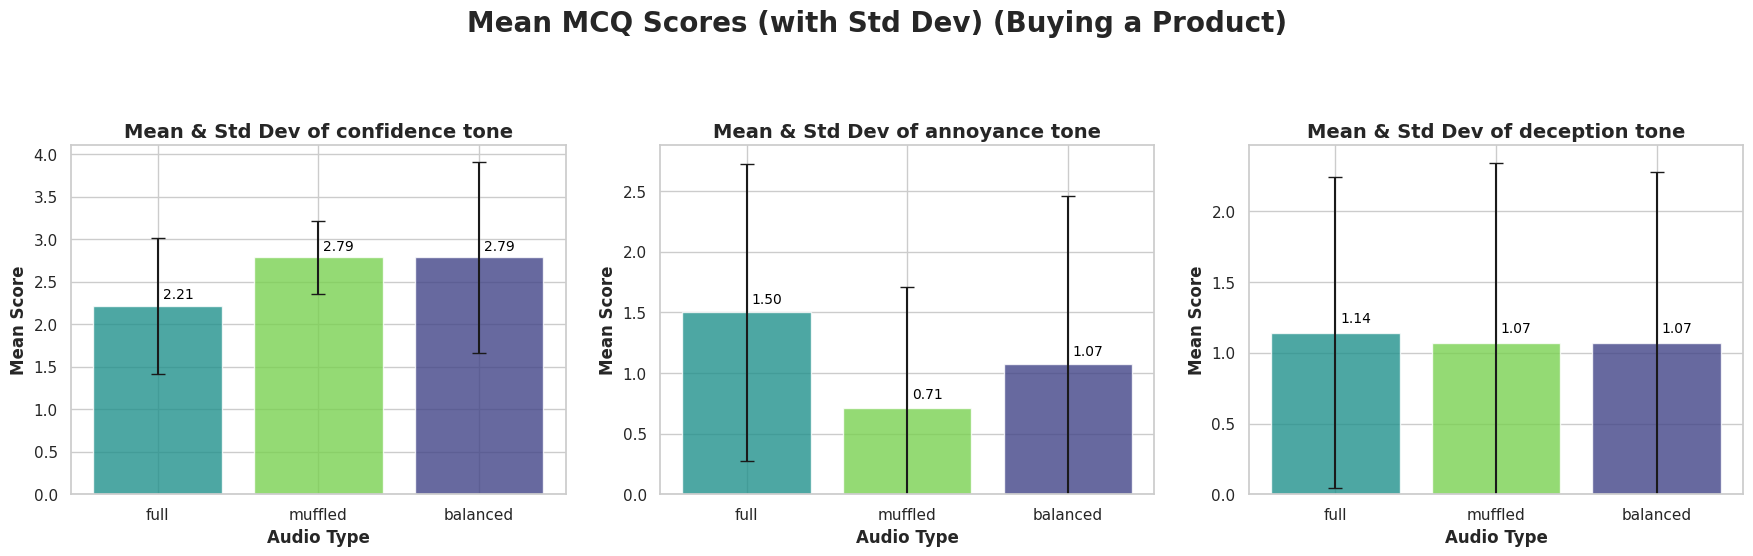


Generating Response Distribution Plots (Mode)...


/tmp/ipython-input-3453217779.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_tick_labels, fontsize=10) # Added fontsize control
/tmp/ipython-input-3453217779.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_tick_labels, fontsize=10) # Added fontsize control
/tmp/ipython-input-3453217779.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_tick_labels, fontsize=10) # Added fontsize control


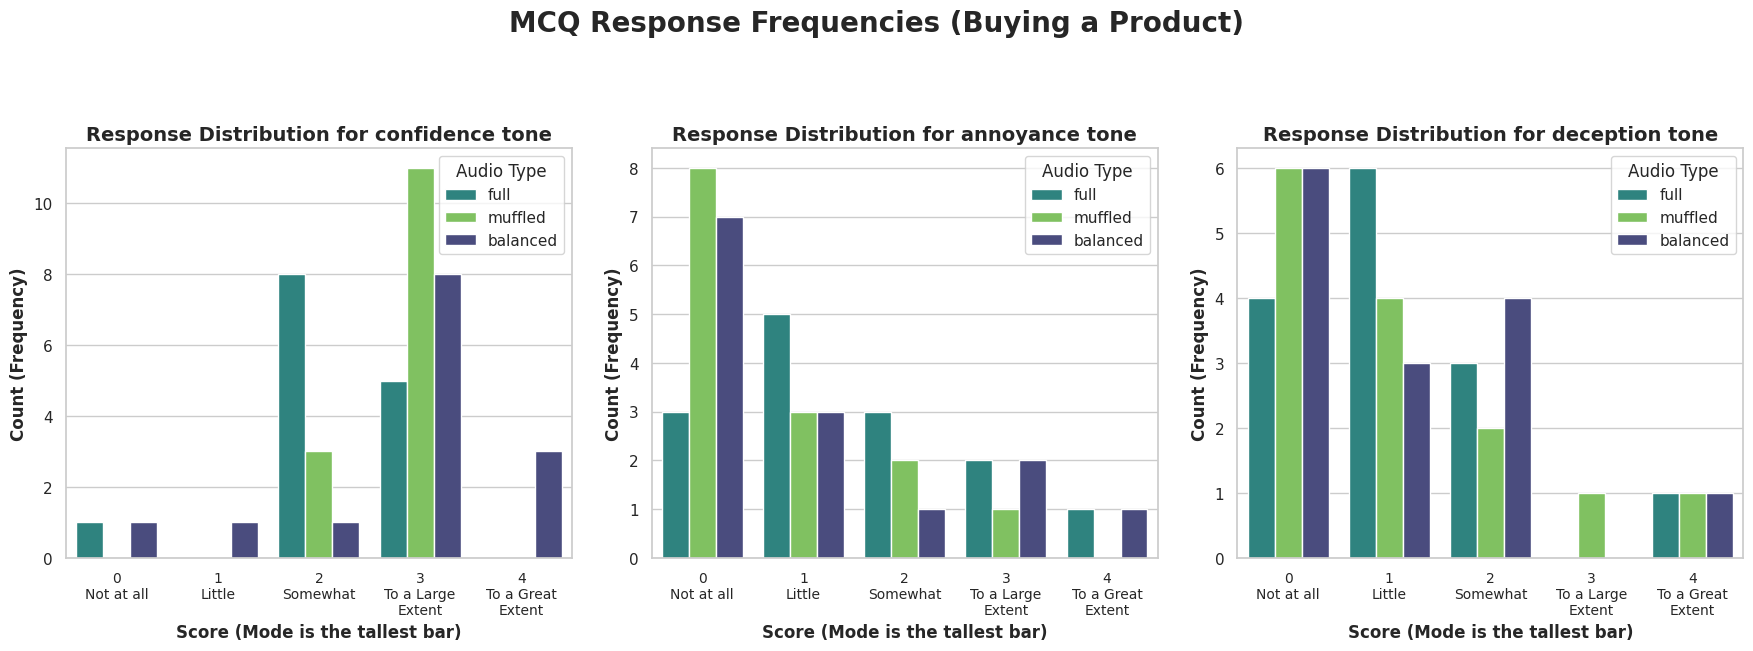


'Buying a Product' MCQ analysis complete.


In [ ]:
# --- NEW: Install statsmodels package ---
!pip install statsmodels

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np
import ast # For safely parsing the list strings

# --- Configuration ---

# We will create these new columns
new_likert_columns = [
    'mcq_q3',
    'mcq_q4',
    'mcq_q5'
]
# Use the same order and colors as before
audio_types = ['full', 'muffled', 'balanced']
plot_colors = [plt.cm.viridis(0.5), plt.cm.viridis(0.8), plt.cm.viridis(0.2)]

# Friendly names for these new questions
likert_labels = {
    'mcq_q3': "confidence tone",
    'mcq_q4': "annoyance tone",
    'mcq_q5': "deception tone"
}

# --- Data Preparation ---
print("="*60)
print("Preparing data for 'Buying a Product'...")
print("="*60)

# We assume 'analysis_df' is already in memory from the previous cell.
# (i.e., df[df['is_calibration'] == False])
# If not, you would uncomment the following lines:
# file_name = "survey_data.csv"
# df = pd.read_csv(file_name)
# analysis_df = df[df['is_calibration'] == False].copy()

# 1. Filter for the specific video
try:
    product_df = analysis_df[analysis_df['video_title'] == 'Buying a Product'].copy()

    if product_df.empty:
        print("Error: No data found for video_title 'Buying a Product'.")
    else:
        print(f"Found {len(product_df)} rows for 'Buying a Product'.")

        # 2. Extract last 3 items from 'mcq_answers'
        def extract_mcq_answers(row):
            try:
                # Safely parse the string "[0, 2, 3, 0, 0]" into a list
                answers = ast.literal_eval(row)
                if isinstance(answers, list) and len(answers) >= 5:
                    # Return the last 3 items (index 2, 3, 4)
                    return answers[2], answers[3], answers[4]
            except (ValueError, SyntaxError):
                pass
            # Return NaNs if parsing fails or list is too short
            return np.nan, np.nan, np.nan

        # Apply the function to create the new columns
        product_df[new_likert_columns] = product_df['mcq_answers'].apply(
            lambda x: pd.Series(extract_mcq_answers(x))
        )

        # 3. Drop rows where we couldn't parse the answers
        product_df.dropna(subset=new_likert_columns, inplace=True)
        # Ensure the new columns are numeric (they might be objects)
        for col in new_likert_columns:
             product_df[col] = pd.to_numeric(product_df[col])

        print(f"Successfully created new columns: {new_likert_columns}")
        print(f"Proceeding with analysis on {len(product_df)} valid rows.")


        # --- Caches to store data for plotting ---
        desc_stats_cache = {}
        anova_data_cache = {}

        # --- Statistical Analysis (Loop through new Qs) ---
        print("\n" + "="*60)
        print("Running Statistical Analysis...")
        print("="*60)

        for likert_col in new_likert_columns:
            print(f"\n--- Analyzing: {likert_labels.get(likert_col, likert_col)} ---")

            # 1. Descriptive Statistics (Mean, Std)
            print("\n[Descriptive Statistics]")
            desc_stats = product_df.groupby('audio_type_assigned')[likert_col].agg(['mean', 'std', 'count'])
            # Ensure we have data for all types before trying to loc
            existing_types_in_order = [at for at in audio_types if at in desc_stats.index]
            if not existing_types_in_order:
                print("No data found for any audio type for this question.")
                continue
            print(desc_stats.loc[existing_types_in_order])
            desc_stats_cache[likert_col] = desc_stats.loc[existing_types_in_order]

            # 2. Prepare data for ANOVA
            print("\n[Statistical Tests]")
            data_full = product_df[product_df['audio_type_assigned'] == 'full'][likert_col].dropna()
            data_muffled = product_df[product_df['audio_type_assigned'] == 'muffled'][likert_col].dropna()
            data_balanced = product_df[product_df['audio_type_assigned'] == 'balanced'][likert_col].dropna()

            anova_data_cache[likert_col] = {
                'full': data_full,
                'muffled': data_muffled,
                'balanced': data_balanced
            }

            # 3. Perform One-Way ANOVA
            if data_balanced.empty or data_full.empty or data_muffled.empty:
                print("Skipping ANOVA: One or more audio types have no data for this column.")
                continue

            f_stat, p_value = stats.f_oneway(data_full, data_muffled, data_balanced)
            print(f"One-Way ANOVA results: F-statistic = {f_stat:.4f}, p-value = {p_value:.4f}")

            # 4. Perform Tukey's HSD Post-Hoc Test
            if p_value < 0.05:
                print("\n[Post-Hoc Test (Tukey's HSD)]")
                all_data = np.concatenate([data_full, data_muffled, data_balanced])
                labels = ['full'] * len(data_full) + ['muffled'] * len(data_muffled) + ['balanced'] * len(data_balanced)
                tukey_result = pairwise_tukeyhsd(all_data, labels, alpha=0.05)
                print(tukey_result)
            else:
                print("\nANOVA was not significant (p >= 0.05).")

        # --- Graphical Output (Box Plots) ---
        print("\n" + "="*60)
        print("Generating Box Plots...")
        print("="*60)
        sns.set(style="whitegrid", palette="viridis")
        fig, axes = plt.subplots(1, 3, figsize=(18, 6)) # 1x3 grid
        fig.suptitle('MCQ Score Distributions (Buying a Product)', fontsize=20, fontweight='bold')
        axes = axes.flatten()

        for i, likert_col in enumerate(new_likert_columns):
            ax = axes[i]
            plot_title = likert_labels.get(likert_col, likert_col)
            sns.boxplot(
                x='audio_type_assigned', y=likert_col, data=product_df,
                order=audio_types, ax=ax, palette=plot_colors
            )
            ax.set_title(f'Distribution of {plot_title}', fontweight='bold', fontsize=14)
            ax.set_xlabel('Audio Type', fontweight='bold', fontsize=12)
            ax.set_ylabel('Score', fontweight='bold', fontsize=12)
        plt.tight_layout(pad=2.0, rect=[0, 0.03, 1, 0.95])
        plt.show()

        # --- Graphical Output (Mean & Std Dev Bar Plots) ---
        print("\n" + "="*60)
        print("Generating Mean & Standard Deviation Plots...")
        print("="*60)
        sns.set(style="whitegrid", palette="viridis")
        fig, axes = plt.subplots(1, 3, figsize=(18, 6)) # 1x3 grid
        fig.suptitle('Mean MCQ Scores (with Std Dev) (Buying a Product)', fontsize=20, fontweight='bold')
        axes = axes.flatten()

        for i, likert_col in enumerate(new_likert_columns):
            ax = axes[i]
            plot_title = likert_labels.get(likert_col, likert_col)
            stats_data = desc_stats_cache.get(likert_col)
            if stats_data is None:
                ax.set_title(f"{plot_title}\n(No data)")
                continue
            stats_data_ordered = stats_data.loc[audio_types]
            bars = ax.bar(
                stats_data_ordered.index, stats_data_ordered['mean'],
                yerr=stats_data_ordered['std'], color=plot_colors,
                capsize=5, alpha=0.8
            )
            for bar in bars:
                yval = bar.get_height()
                text_x_pos = bar.get_x() + bar.get_width() / 2.0 + 0.03
                text_y_pos = yval + 0.05
                ax.text(text_x_pos, text_y_pos, f'{yval:.2f}',
                         ha='left', va='bottom', fontsize=10, color='black')
            ax.set_title(f'Mean & Std Dev of {plot_title}', fontweight='bold', fontsize=14)
            ax.set_xlabel('Audio Type', fontweight='bold', fontsize=12)
            ax.set_ylabel('Mean Score', fontweight='bold', fontsize=12)
            # Adjust y-lim, start from 0 as it's a 0-indexed scale
            ax.set_ylim(bottom=0)

        plt.tight_layout(pad=2.0, rect=[0, 0.03, 1, 0.95])
        plt.show()

        # --- Graphical Output (Mode & Distribution Plots) ---
        print("\n" + "="*60)
        print("Generating Response Distribution Plots (Mode)...")
        print("="*60)
        sns.set(style="whitegrid", palette="viridis")
        fig, axes = plt.subplots(1, 3, figsize=(18, 7)) # 1x3 grid
        fig.suptitle('MCQ Response Frequencies (Buying a Product)', fontsize=20, fontweight='bold')
        axes = axes.flatten()

        for i, likert_col in enumerate(new_likert_columns):
            ax = axes[i]
            plot_title = likert_labels.get(likert_col, likert_col)
            sns.countplot(
                x=likert_col, hue='audio_type_assigned', hue_order=audio_types,
                data=product_df, ax=ax, palette=plot_colors
            )
            ax.set_title(f'Response Distribution for {plot_title}', fontweight='bold', fontsize=14)
            ax.set_xlabel('Score (Mode is the tallest bar)', fontweight='bold', fontsize=12)
            ax.set_ylabel('Count (Frequency)', fontweight='bold', fontsize=12)

            # --- NEW: Set custom x-tick labels ---
            # Create a mapping for the labels
            label_map = {
                '0': '0\nNot at all',
                '0.0': '0\nNot at all',
                '1': '1\nLittle',
                '1.0': '1\nLittle',
                '2': '2\nSomewhat',
                '2.0': '2\nSomewhat',
                '3': '3\nTo a Large\nExtent',
                '3.0': '3\nTo a Large\nExtent',
                '4': '4\nTo a Great\nExtent',
                '4.0': '4\nTo a Great\nExtent'
            }

            # Get the current tick labels (which are just numbers 0.0, 1.0, etc.)
            current_tick_texts = [label.get_text() for label in ax.get_xticklabels()]
            new_tick_labels = [label_map.get(text, text) for text in current_tick_texts]

            if new_tick_labels: # Only set if we have labels
                ax.set_xticklabels(new_tick_labels, fontsize=10) # Added fontsize control
            # --- End of new tick label code ---

            ax.legend(title='Audio Type')

        plt.tight_layout(pad=2.0, rect=[0, 0.03, 1, 0.95])
        plt.show()

        print("\n'Buying a Product' MCQ analysis complete.")

except NameError:
    print("\nError: The DataFrame 'analysis_df' was not found.")
    print("Please ensure you have run the previous cells to load and define 'analysis_df'.")
except Exception as e:
    print(f"\nAn error occurred: {e}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np
import ast # For safely parsing the list strings

# --- Reusable Function ---

# --- Global Constants (for styling and order) ---
# Order: ['full', 'muffled', 'balanced']
# Colors: full = 0.5, muffled = 0.8, balanced = 0.2
AUDIO_TYPES_ORDER = ['full', 'muffled', 'balanced']
AUDIO_TYPES_COLORS = [plt.cm.viridis(0.5), plt.cm.viridis(0.8), plt.cm.viridis(0.2)]
SNIPPET_NUMBERS = [0, 1, 2]
SNIPPET_HUE_COLORS = sns.color_palette("muted", 3) # Palette for snippet number

def analyze_video_mcqs(video_title, question_labels, analysis_df):
    """
    Performs a full statistical and graphical analysis on the last N MCQ answers
    for a specific video, grouped by audio type and snippet number.

    Args:
        video_title (str): The exact title of the video to filter from 'video_title' column.
        question_labels (dict): A dictionary mapping new column names to friendly labels.
                                The number of items determines how many MCQ answers are extracted.
                                e.g., {'mcq_q3': "Confidence", 'mcq_q4': "Annoyance"}
        analysis_df (pd.DataFrame): The pre-loaded, non-calibration DataFrame.
    """

    # --- Configuration from Parameters ---
    new_likert_columns = list(question_labels.keys())
    num_questions = len(new_likert_columns)

    # --- Data Preparation ---
    print("="*60)
    print(f"Preparing data for '{video_title}'...")
    print("="*60)

    # 1. Filter for the specific video
    try:
        product_df = analysis_df[analysis_df['video_title'] == video_title].copy()

        if product_df.empty:
            print(f"Error: No data found for video_title '{video_title}'. Analysis stopped.")
            return
        else:
            print(f"Found {len(product_df)} rows for '{video_title}'.")

        # 2. Extract last N items from 'mcq_answers'
        def extract_mcq_answers_to_series(row):
            """
            Extracts the N answers (from index 2 onwards) corresponding to the
            number of questions in `question_labels`.
            """
            try:
                answers = ast.literal_eval(row)
                # Assumes first 2 MCQs are standard, and the rest are the custom ones
                if isinstance(answers, list) and len(answers) >= (2 + num_questions):
                    # Get answers from index 2 up to 2 + num_questions
                    extracted_data = answers[2 : 2 + num_questions]
                    return pd.Series(extracted_data, index=new_likert_columns)
            except (ValueError, SyntaxError):
                pass
            # Return a Series of NaNs with the correct index
            return pd.Series([np.nan] * num_questions, index=new_likert_columns)

        # Apply the function to create the new columns
        product_df[new_likert_columns] = product_df['mcq_answers'].apply(extract_mcq_answers_to_series)

        # 3. Drop rows where we couldn't parse the answers
        product_df.dropna(subset=new_likert_columns, inplace=True)
        # Ensure the new columns are numeric (they might be objects)
        for col in new_likert_columns:
             product_df[col] = pd.to_numeric(product_df[col])

        # Create combined group column for stats
        product_df['group'] = product_df['audio_type_assigned'] + '_' + product_df['snippet_number'].astype(str)

        if len(product_df) == 0:
            print(f"Error: No valid data after extracting answers for '{video_title}'. Analysis stopped.")
            return

        print(f"Successfully created new columns: {new_likert_columns}")
        print(f"Proceeding with analysis on {len(product_df)} valid rows.")

        # --- Caches to store data for plotting ---
        desc_stats_cache = {}

        # --- Statistical Analysis (Loop through new Qs) ---
        print("\n" + "="*60)
        print(f"Running Statistical Analysis for '{video_title}'...")
        print("="*60)

        for likert_col in new_likert_columns:
            print(f"\n--- Analyzing: {question_labels.get(likert_col, likert_col)} ---")

            # 1. Descriptive Statistics (Mean, Std)
            print("\n[Descriptive Statistics]")
            desc_stats = product_df.groupby(['audio_type_assigned', 'snippet_number'])[likert_col].agg(['mean', 'std', 'count'])
            # Reorder index to match global order
            desc_stats = desc_stats.reindex(AUDIO_TYPES_ORDER, level='audio_type_assigned')
            print(desc_stats)
            desc_stats_cache[likert_col] = desc_stats

            # 2. Prepare data for ANOVA
            print("\n[Statistical Tests]")
            all_data_for_test = product_df.dropna(subset=[likert_col])

            if all_data_for_test['group'].nunique() < 2:
                print("Skipping ANOVA: Not enough groups to compare.")
                continue

            # 3. Perform One-Way ANOVA on the 9 groups
            groups_data = [
                all_data_for_test[all_data_for_test['group'] == g][likert_col]
                for g in all_data_for_test['group'].unique()
            ]
            f_stat, p_value = stats.f_oneway(*groups_data)
            print(f"One-Way ANOVA (all groups) results: F-statistic = {f_stat:.4f}, p-value = {p_value:.4f}")

            # 4. Perform Tukey's HSD Post-Hoc Test
            if p_value < 0.05:
                print("\n[Post-Hoc Test (Tukey's HSD)]")
                tukey_result = pairwise_tukeyhsd(
                    all_data_for_test[likert_col],
                    all_data_for_test['group'],
                    alpha=0.05
                )
                print(tukey_result)
            else:
                print("\nANOVA was not significant (p >= 0.05).")

        # --- Graphical Output (Box Plots) ---
        print("\n" + "="*60)
        print("Generating Box Plots...")
        print("="*60)
        sns.set(style="whitegrid")
        fig, axes = plt.subplots(1, num_questions, figsize=(7 * num_questions, 7), squeeze=False)
        fig.suptitle(f'MCQ Score Distributions ({video_title})', fontsize=20, fontweight='bold')
        axes = axes.flatten()

        for i, likert_col in enumerate(new_likert_columns):
            ax = axes[i]
            plot_title = question_labels.get(likert_col, likert_col)
            sns.boxplot(
                x='audio_type_assigned', y=likert_col, hue='snippet_number',
                data=product_df,
                order=AUDIO_TYPES_ORDER, hue_order=SNIPPET_NUMBERS,
                ax=ax, palette="muted"
            )
            ax.set_title(f'Distribution of {plot_title}', fontweight='bold', fontsize=14)
            ax.set_xlabel('Audio Type', fontweight='bold', fontsize=12)
            ax.set_ylabel('Score', fontweight='bold', fontsize=12)
            ax.legend(title='Snippet #')
        plt.tight_layout(pad=2.0, rect=[0, 0.03, 1, 0.95])
        plt.show()

        # --- Graphical Output (Mean Bar Plots - NO Std Dev) ---
        print("\n" + "="*60)
        print("Generating Mean Score Plots...")
        print("="*60)
        sns.set(style="whitegrid")
        fig, axes = plt.subplots(1, num_questions, figsize=(7 * num_questions, 7), squeeze=False)
        fig.suptitle(f'Mean MCQ Scores ({video_title})', fontsize=20, fontweight='bold')
        axes = axes.flatten()

        for i, likert_col in enumerate(new_likert_columns):
            ax = axes[i]
            plot_title = question_labels.get(likert_col, likert_col)

            # --- MODIFIED: Explicitly set errorbar=None ---
            sns.barplot(
                x='audio_type_assigned', y=likert_col, hue='snippet_number',
                data=product_df,
                order=AUDIO_TYPES_ORDER, hue_order=SNIPPET_NUMBERS,
                ax=ax, palette="muted",
                errorbar=None # Explicitly remove error bars
            )

            for p in ax.patches:
                if p.get_height() == 0: continue
                ax.annotate(
                    f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points',
                    fontsize=9
                )
            ax.set_title(f'Mean of {plot_title}', fontweight='bold', fontsize=14)
            ax.set_xlabel('Audio Type', fontweight='bold', fontsize=12)
            ax.set_ylabel('Mean Score', fontweight='bold', fontsize=12)
            ax.legend(title='Snippet #')
            ax.set_ylim(bottom=0)
        plt.tight_layout(pad=2.0, rect=[0, 0.03, 1, 0.95])
        plt.show()

        # --- Graphical Output (Mode & Distribution Plots) ---
        print("\n" + "="*60)
        print("Generating Response Distribution Plots (Mode)...")
        print("="*60)
        sns.set(style="whitegrid")
        fig, axes = plt.subplots(num_questions, 1, figsize=(18, 8 * num_questions), squeeze=False)
        fig.suptitle(f'MCQ Response Frequencies ({video_title})', fontsize=20, fontweight='bold')
        axes = axes.flatten()

        group_order = [f"{at}_{sn}" for at in AUDIO_TYPES_ORDER for sn in SNIPPET_NUMBERS]
        count_plot_colors = sns.color_palette("viridis", len(group_order))

        for i, likert_col in enumerate(new_likert_columns):
            ax = axes[i]
            plot_title = question_labels.get(likert_col, likert_col)
            sns.countplot(
                x=likert_col, hue='group', hue_order=group_order,
                data=product_df, ax=ax, palette=count_plot_colors
            )
            ax.set_title(f'Response Distribution for {plot_title}', fontweight='bold', fontsize=14)
            ax.set_xlabel('Score (Mode is the tallest bar)', fontweight='bold', fontsize=12)
            ax.set_ylabel('Count (Frequency)', fontweight='bold', fontsize=12)

            label_map = {
                '0': '0\nNot at all', '0.0': '0\nNot at all',
                '1': '1\nLittle', '1.0': '1\nLittle',
                '2': '2\nSomewhat', '2.0': '2\nSomewhat',
                '3': '3\nTo a Large\nExtent', '3.0': '3\nTo a Large\nExtent',
                '4': '4\nTo a Great\nExtent', '4.0': '4\nTo a Great\nExtent'
            }
            current_tick_texts = [label.get_text() for label in ax.get_xticklabels()]
            new_tick_labels = [label_map.get(text, text) for text in current_tick_texts]
            if new_tick_labels:
                ax.set_xticklabels(new_tick_labels, fontsize=10)

            ax.legend(title='Audio Type - Snippet #')
        plt.tight_layout(pad=2.0, rect=[0, 0.03, 1, 0.95])
        plt.show()

        # --- Graphical Output (Specific Snippet Analysis) ---
        print("\n" + "="*60)
        print("Generating Specific Snippet-Question Analysis Plots...")
        print("="*60)
        sns.set(style="whitegrid")
        fig, axes = plt.subplots(1, num_questions, figsize=(7 * num_questions, 7), squeeze=False)
        fig.suptitle(f'Mean Scores for Specific Question/Snippet Combinations ({video_title})', fontsize=20, fontweight='bold')
        axes = axes.flatten()

        # Build plot_specs dynamically
        plot_specs = []
        for i, col_name in enumerate(new_likert_columns):
            # Assumes snippet numbers (0, 1, 2) align with question order (q3, q4, q5)
            snippet_num_to_plot = SNIPPET_NUMBERS[i] if i < len(SNIPPET_NUMBERS) else SNIPPET_NUMBERS[0]
            ax_to_plot = axes[i]
            plot_specs.append( (col_name, snippet_num_to_plot, ax_to_plot) )

        for col, sn, ax in plot_specs:
            plot_title = question_labels.get(col, col)
            snippet_data = product_df[product_df['snippet_number'] == sn]

            if snippet_data.empty:
                ax.set_title(f"Mean '{plot_title}' (Snippet {sn} Only)\nNo Data", fontweight='bold', fontsize=14)
                continue

            # --- MODIFIED: Explicitly set errorbar=None ---
            sns.barplot(
                x='audio_type_assigned', y=col,
                data=snippet_data,
                order=AUDIO_TYPES_ORDER,
                ax=ax,
                palette=AUDIO_TYPES_COLORS,
                errorbar=None # Explicitly remove error bars
            )

            for p in ax.patches:
                if p.get_height() == 0: continue
                ax.annotate(
                    f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points',
                    fontsize=10
                )
            ax.set_title(f"Mean '{plot_title}' (Snippet {sn} Only)", fontweight='bold', fontsize=14)
            ax.set_xlabel('Audio Type', fontweight='bold', fontsize=12)
            ax.set_ylabel('Mean Score', fontweight='bold', fontsize=12)
            ax.set_ylim(bottom=0)
        plt.tight_layout(pad=2.0, rect=[0, 0.03, 1, 0.95])
        plt.show()

        print(f"\n'{video_title}' MCQ analysis complete.")

    except NameError:
        print("\nError: The DataFrame 'analysis_df' was not found.")
        print("Please ensure 'analysis_df' is defined in your environment (e.g., from a previous cell).")
    except Exception as e:
        print(f"\nAn error occurred: {e}")



Preparing data for 'Buying a Product'...
Found 42 rows for 'Buying a Product'.
Successfully created new columns: ['mcq_q3', 'mcq_q4', 'mcq_q5']
Proceeding with analysis on 42 valid rows.

Running Statistical Analysis for 'Buying a Product'...

--- Analyzing: confidence tone ---

[Descriptive Statistics]
                                        mean       std  count
audio_type_assigned snippet_number                           
full                0               2.666667  0.577350      3
                    1               2.000000  0.000000      5
                    2               2.166667  1.169045      6
muffled             0               2.833333  0.408248      6
                    1               2.800000  0.447214      5
                    2               2.666667  0.577350      3
balanced            0               3.200000  0.836660      5
                    1               2.250000  1.500000      4
                    2               2.800000  1.095445      5

[Statistical

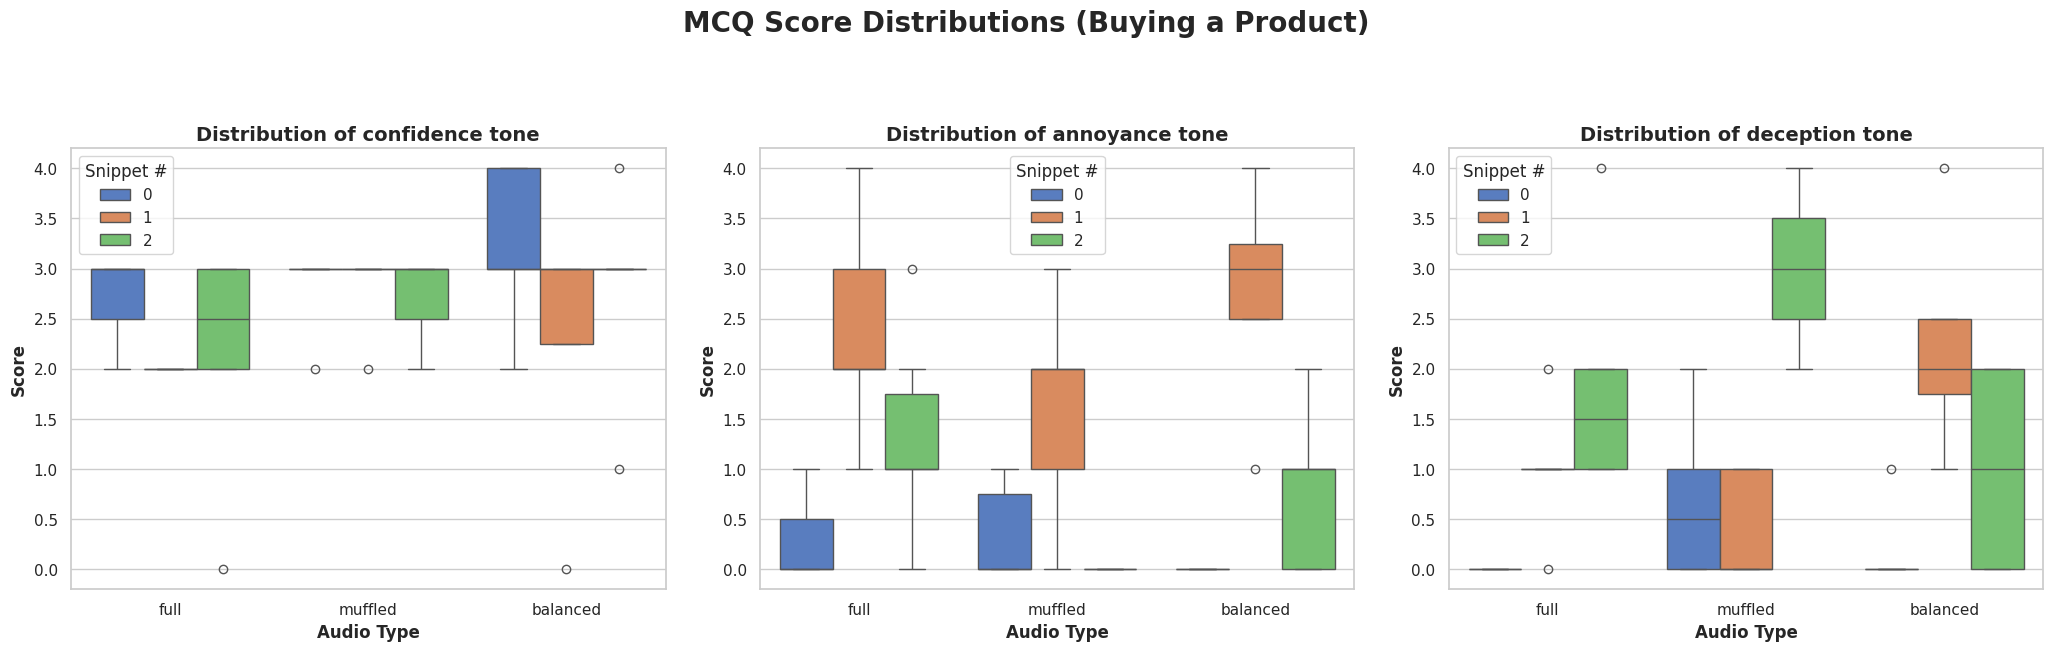


Generating Mean Score Plots...


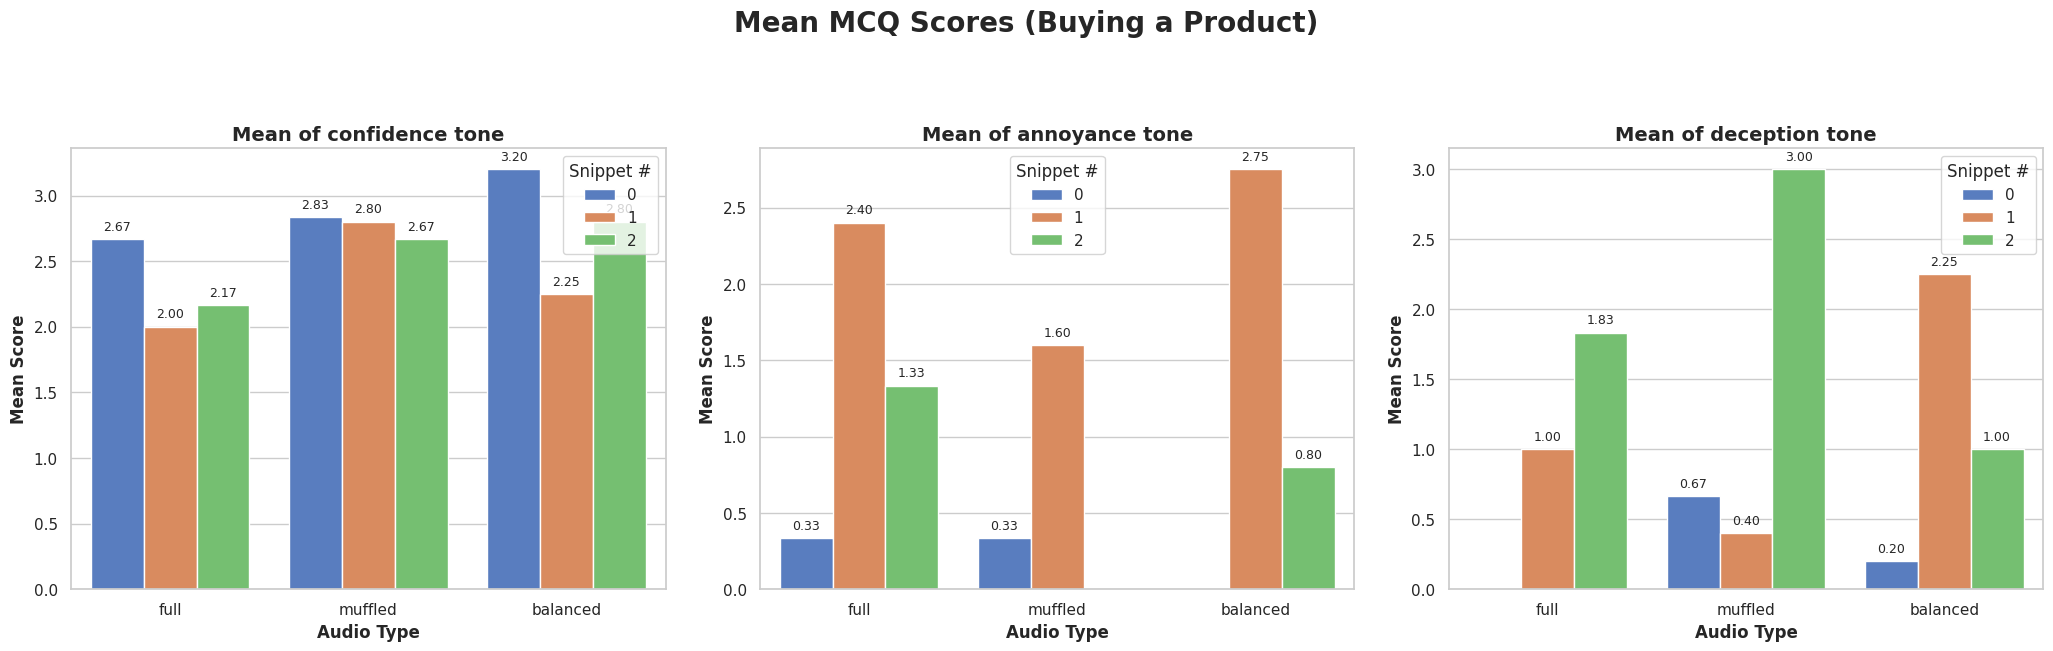


Generating Response Distribution Plots (Mode)...


/tmp/ipython-input-2512964219.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_tick_labels, fontsize=10)
/tmp/ipython-input-2512964219.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_tick_labels, fontsize=10)
/tmp/ipython-input-2512964219.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_tick_labels, fontsize=10)


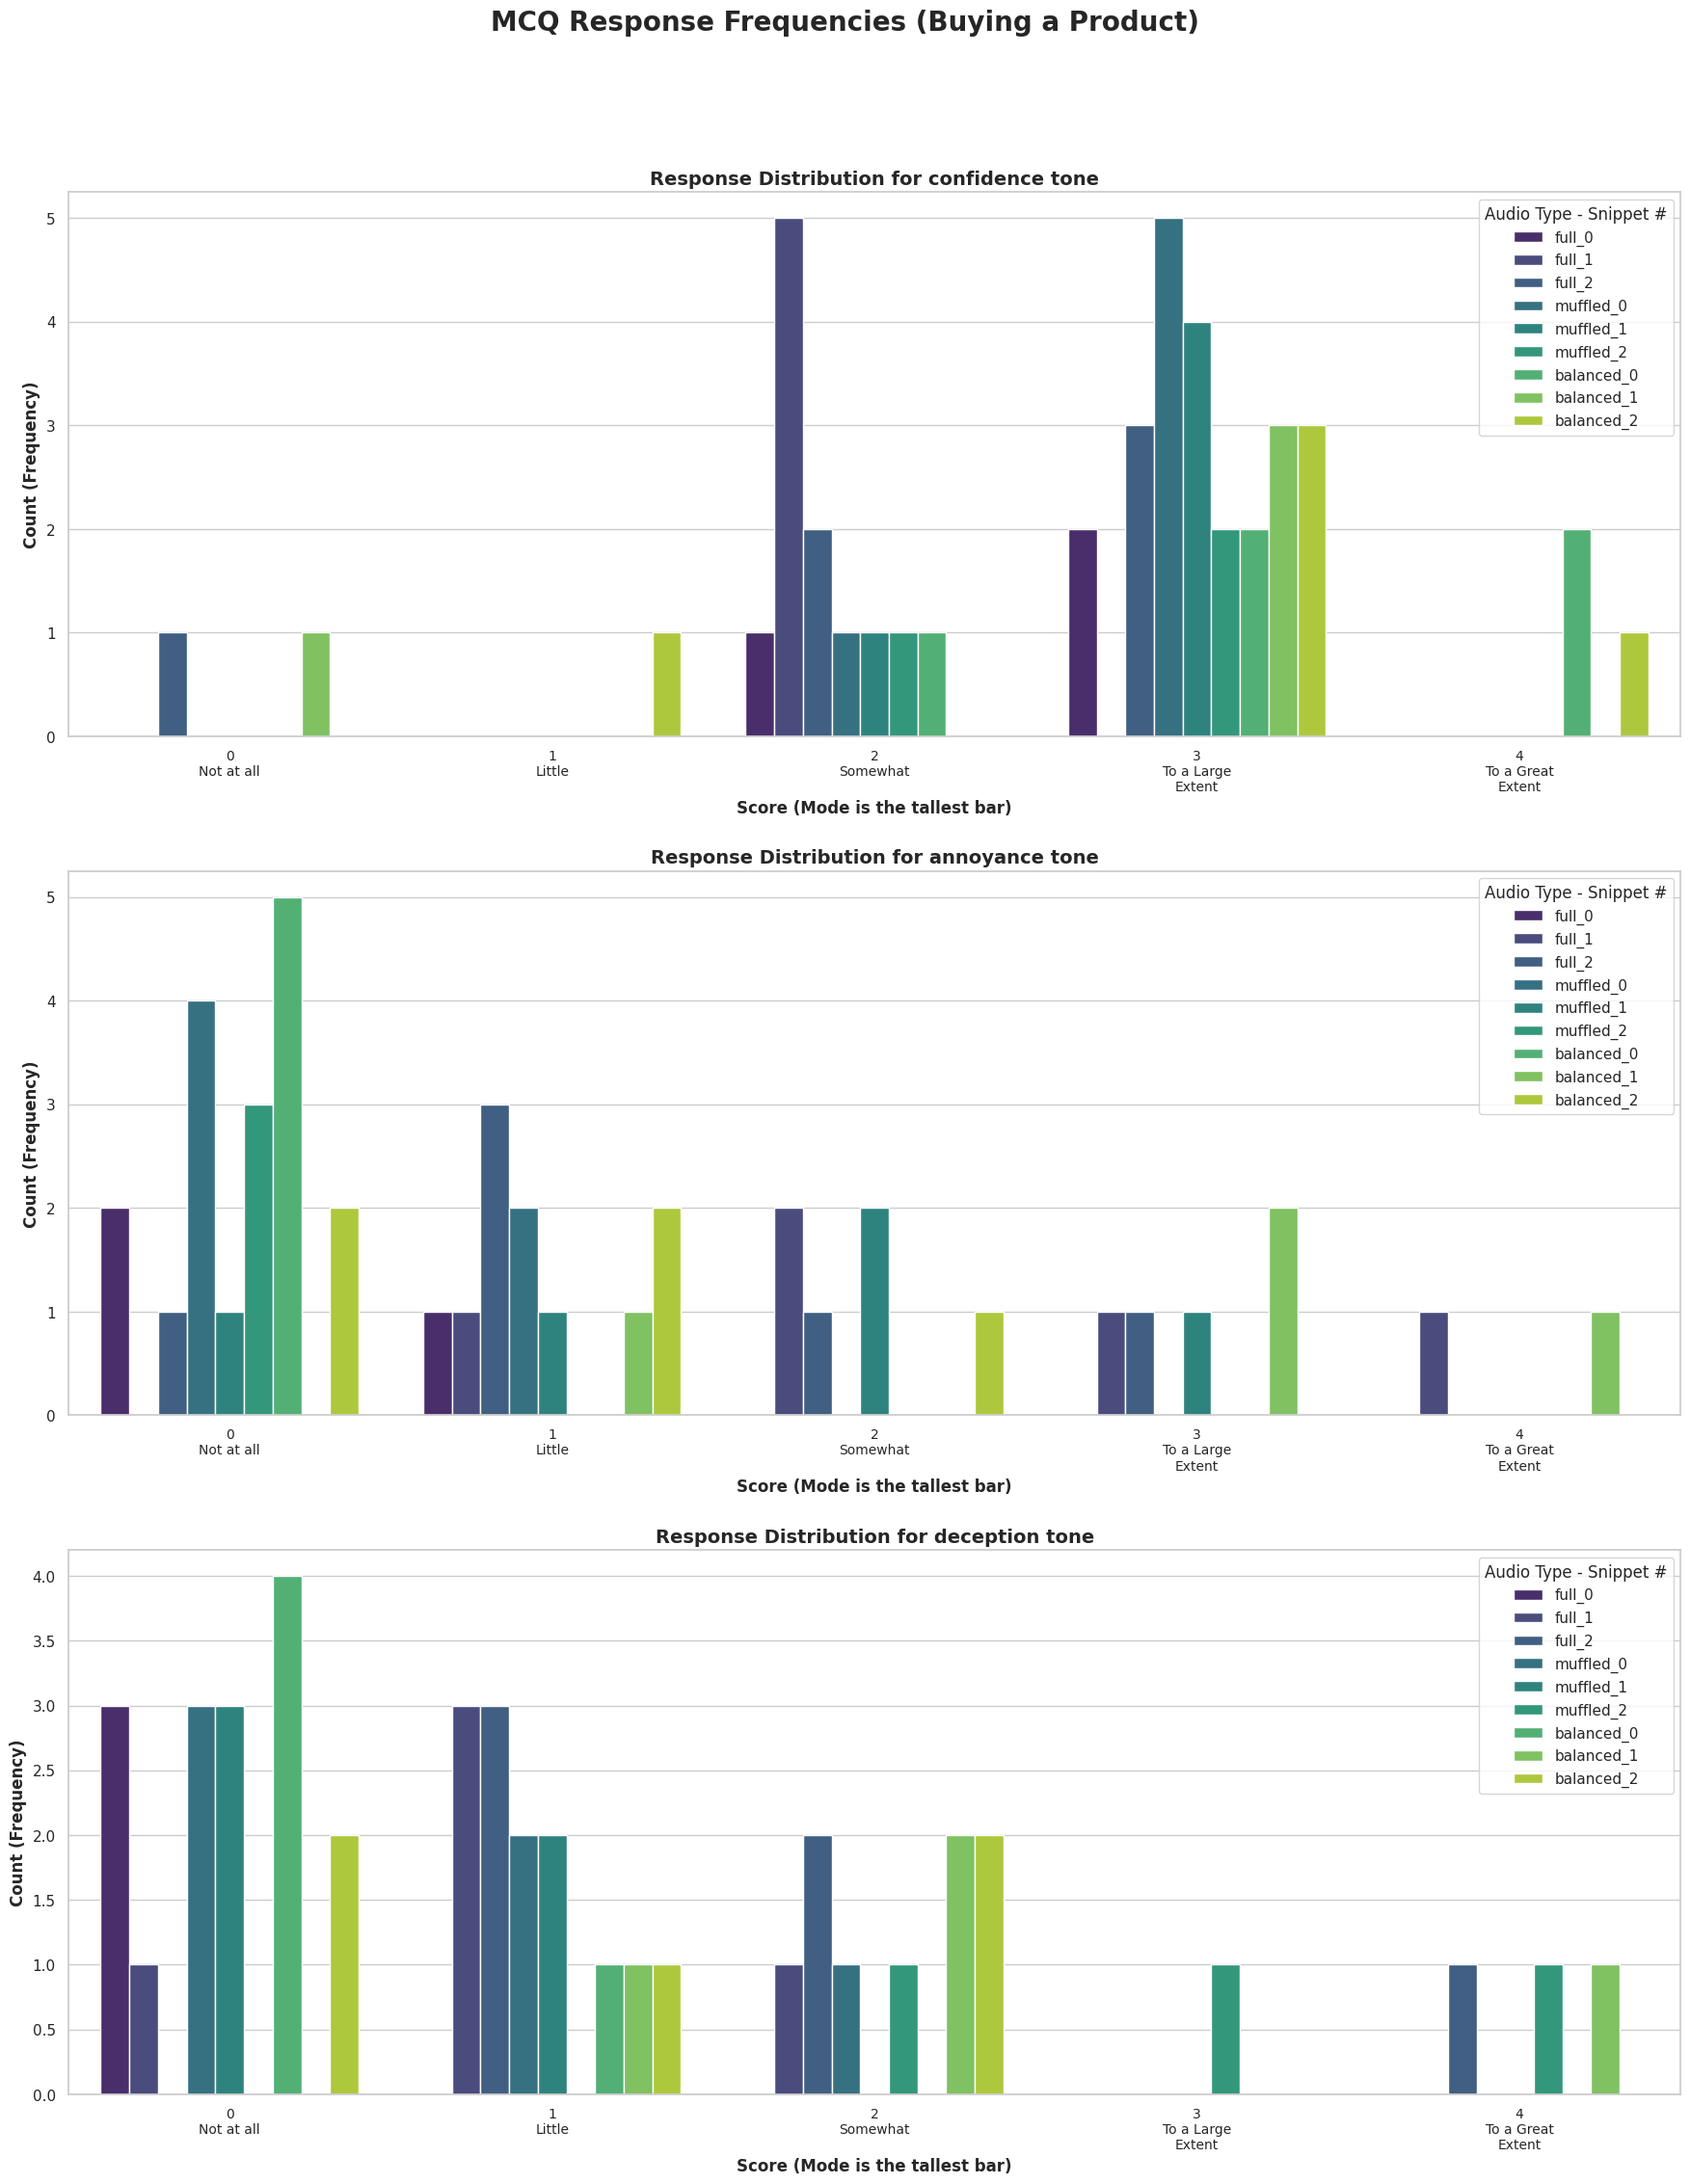


Generating Specific Snippet-Question Analysis Plots...


/tmp/ipython-input-2512964219.py:265: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2512964219.py:265: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2512964219.py:265: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


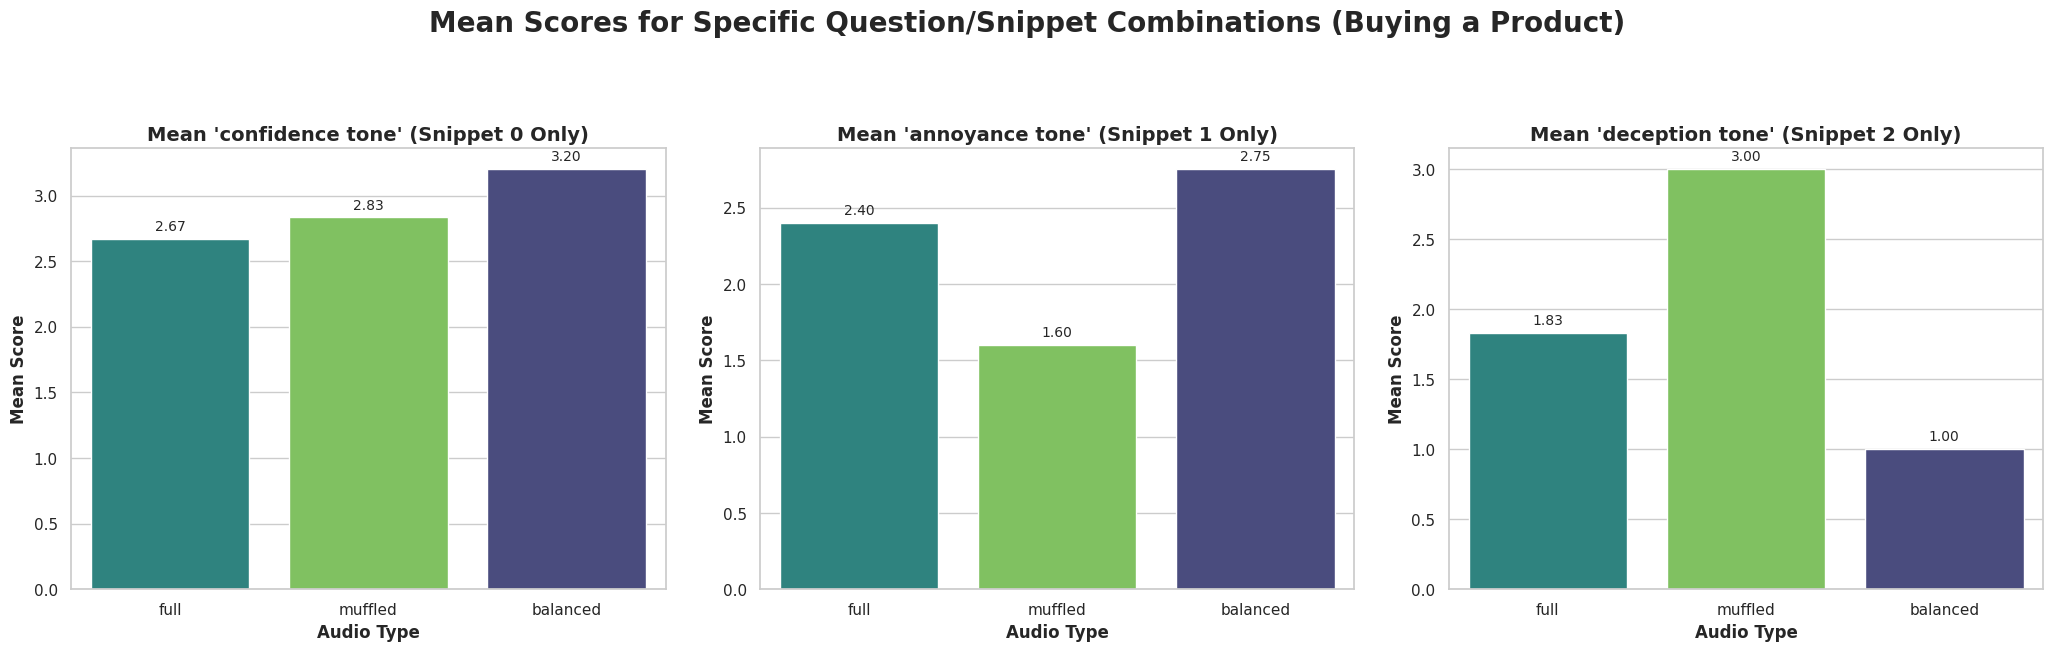


'Buying a Product' MCQ analysis complete.


In [ ]:

# 1. Define labels for 'Buying a Product'
product_labels = {
  'mcq_q3': "confidence tone",
  'mcq_q4': "annoyance tone",
  'mcq_q5': "deception tone"
}

# 2. Run analysis for 'Buying a Product'
analyze_video_mcqs(
  video_title='Buying a Product',
  question_labels=product_labels,
  analysis_df=analysis_df
)


Preparing data for 'Two Friends Gossiping'...
Found 42 rows for 'Two Friends Gossiping'.
Successfully created new columns: ['mcq_q3', 'mcq_q4', 'mcq_q5']
Proceeding with analysis on 42 valid rows.

Running Statistical Analysis for 'Two Friends Gossiping'...

--- Analyzing: Bitter tone ---

[Descriptive Statistics]
                                        mean       std  count
audio_type_assigned snippet_number                           
full                0               2.666667  0.816497      6
                    1               0.666667  1.154701      3
                    2               3.000000  0.707107      5
muffled             0               3.333333  1.154701      3
                    1               1.428571  1.133893      7
                    2               1.500000  1.000000      4
balanced            0               2.400000  1.341641      5
                    1               1.500000  1.000000      4
                    2               2.200000  1.643168      5

[

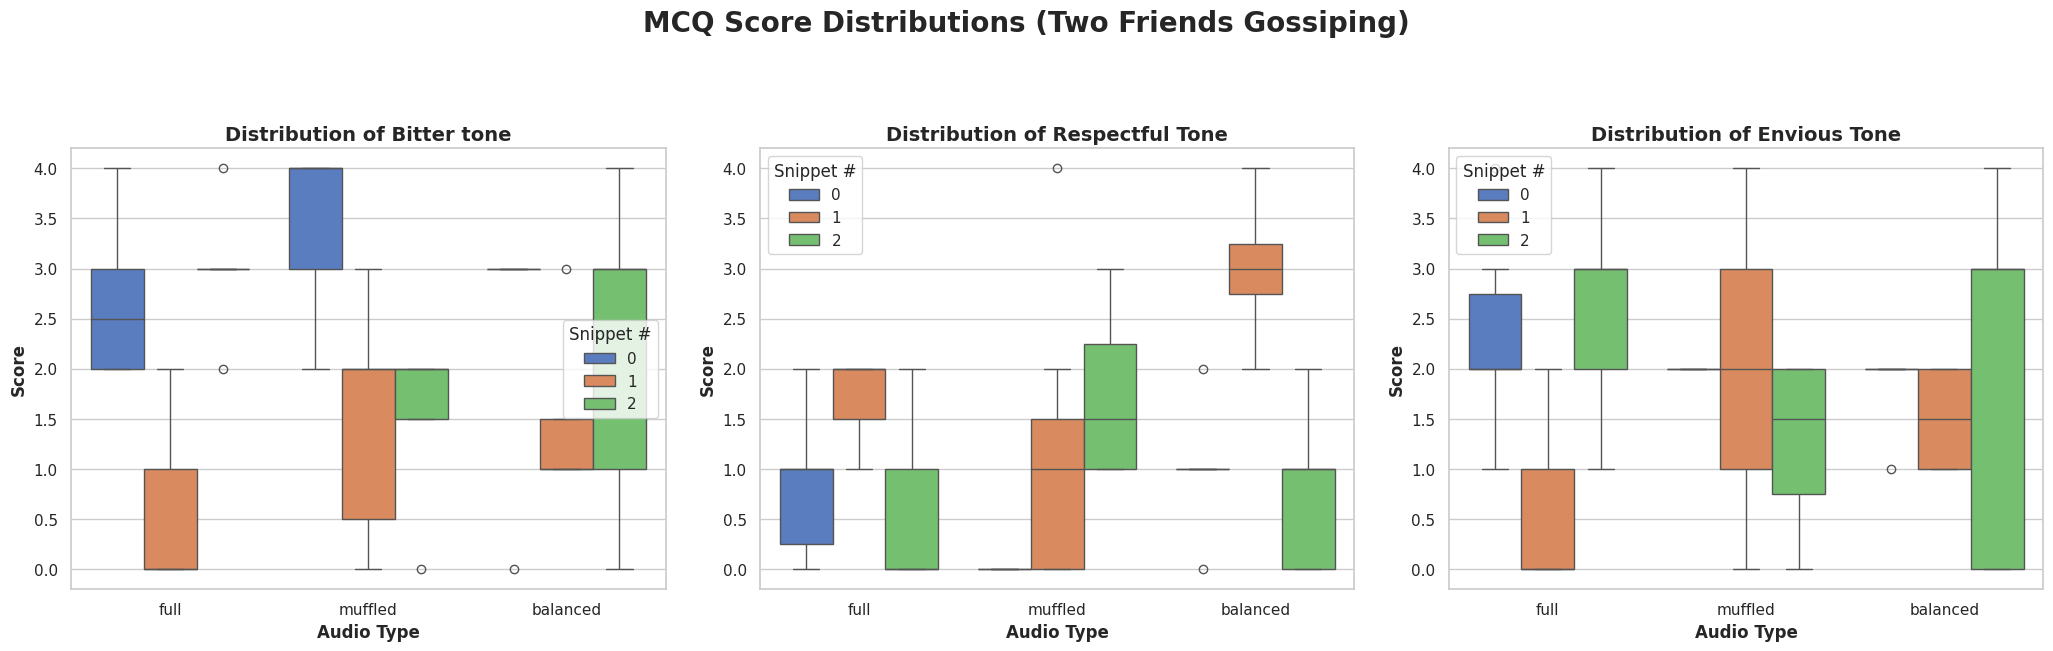


Generating Mean Score Plots...


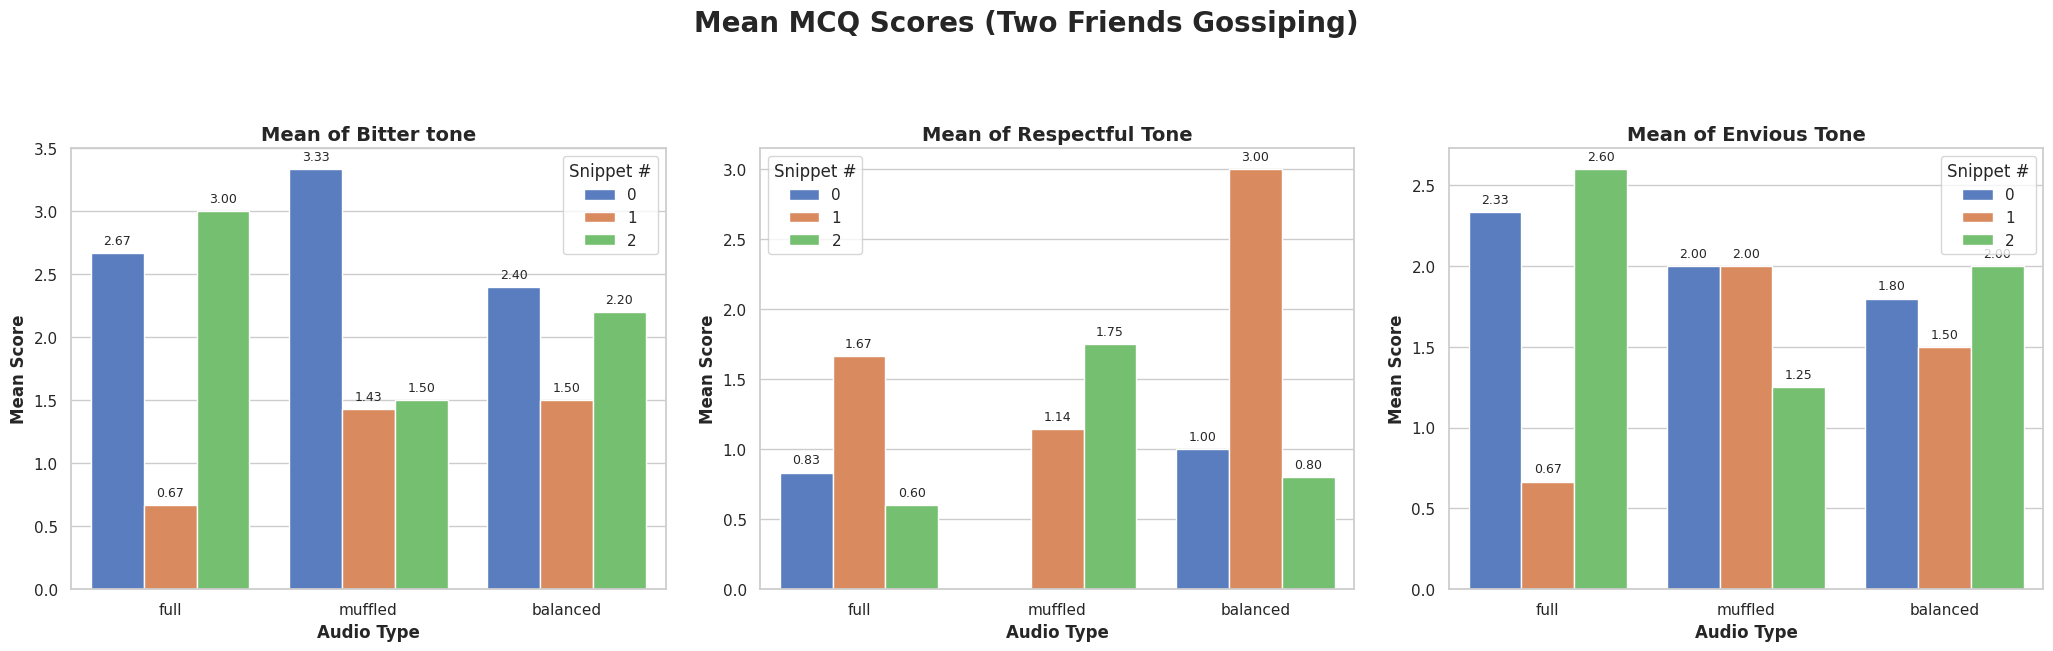


Generating Response Distribution Plots (Mode)...


/tmp/ipython-input-2512964219.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_tick_labels, fontsize=10)
/tmp/ipython-input-2512964219.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_tick_labels, fontsize=10)
/tmp/ipython-input-2512964219.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_tick_labels, fontsize=10)


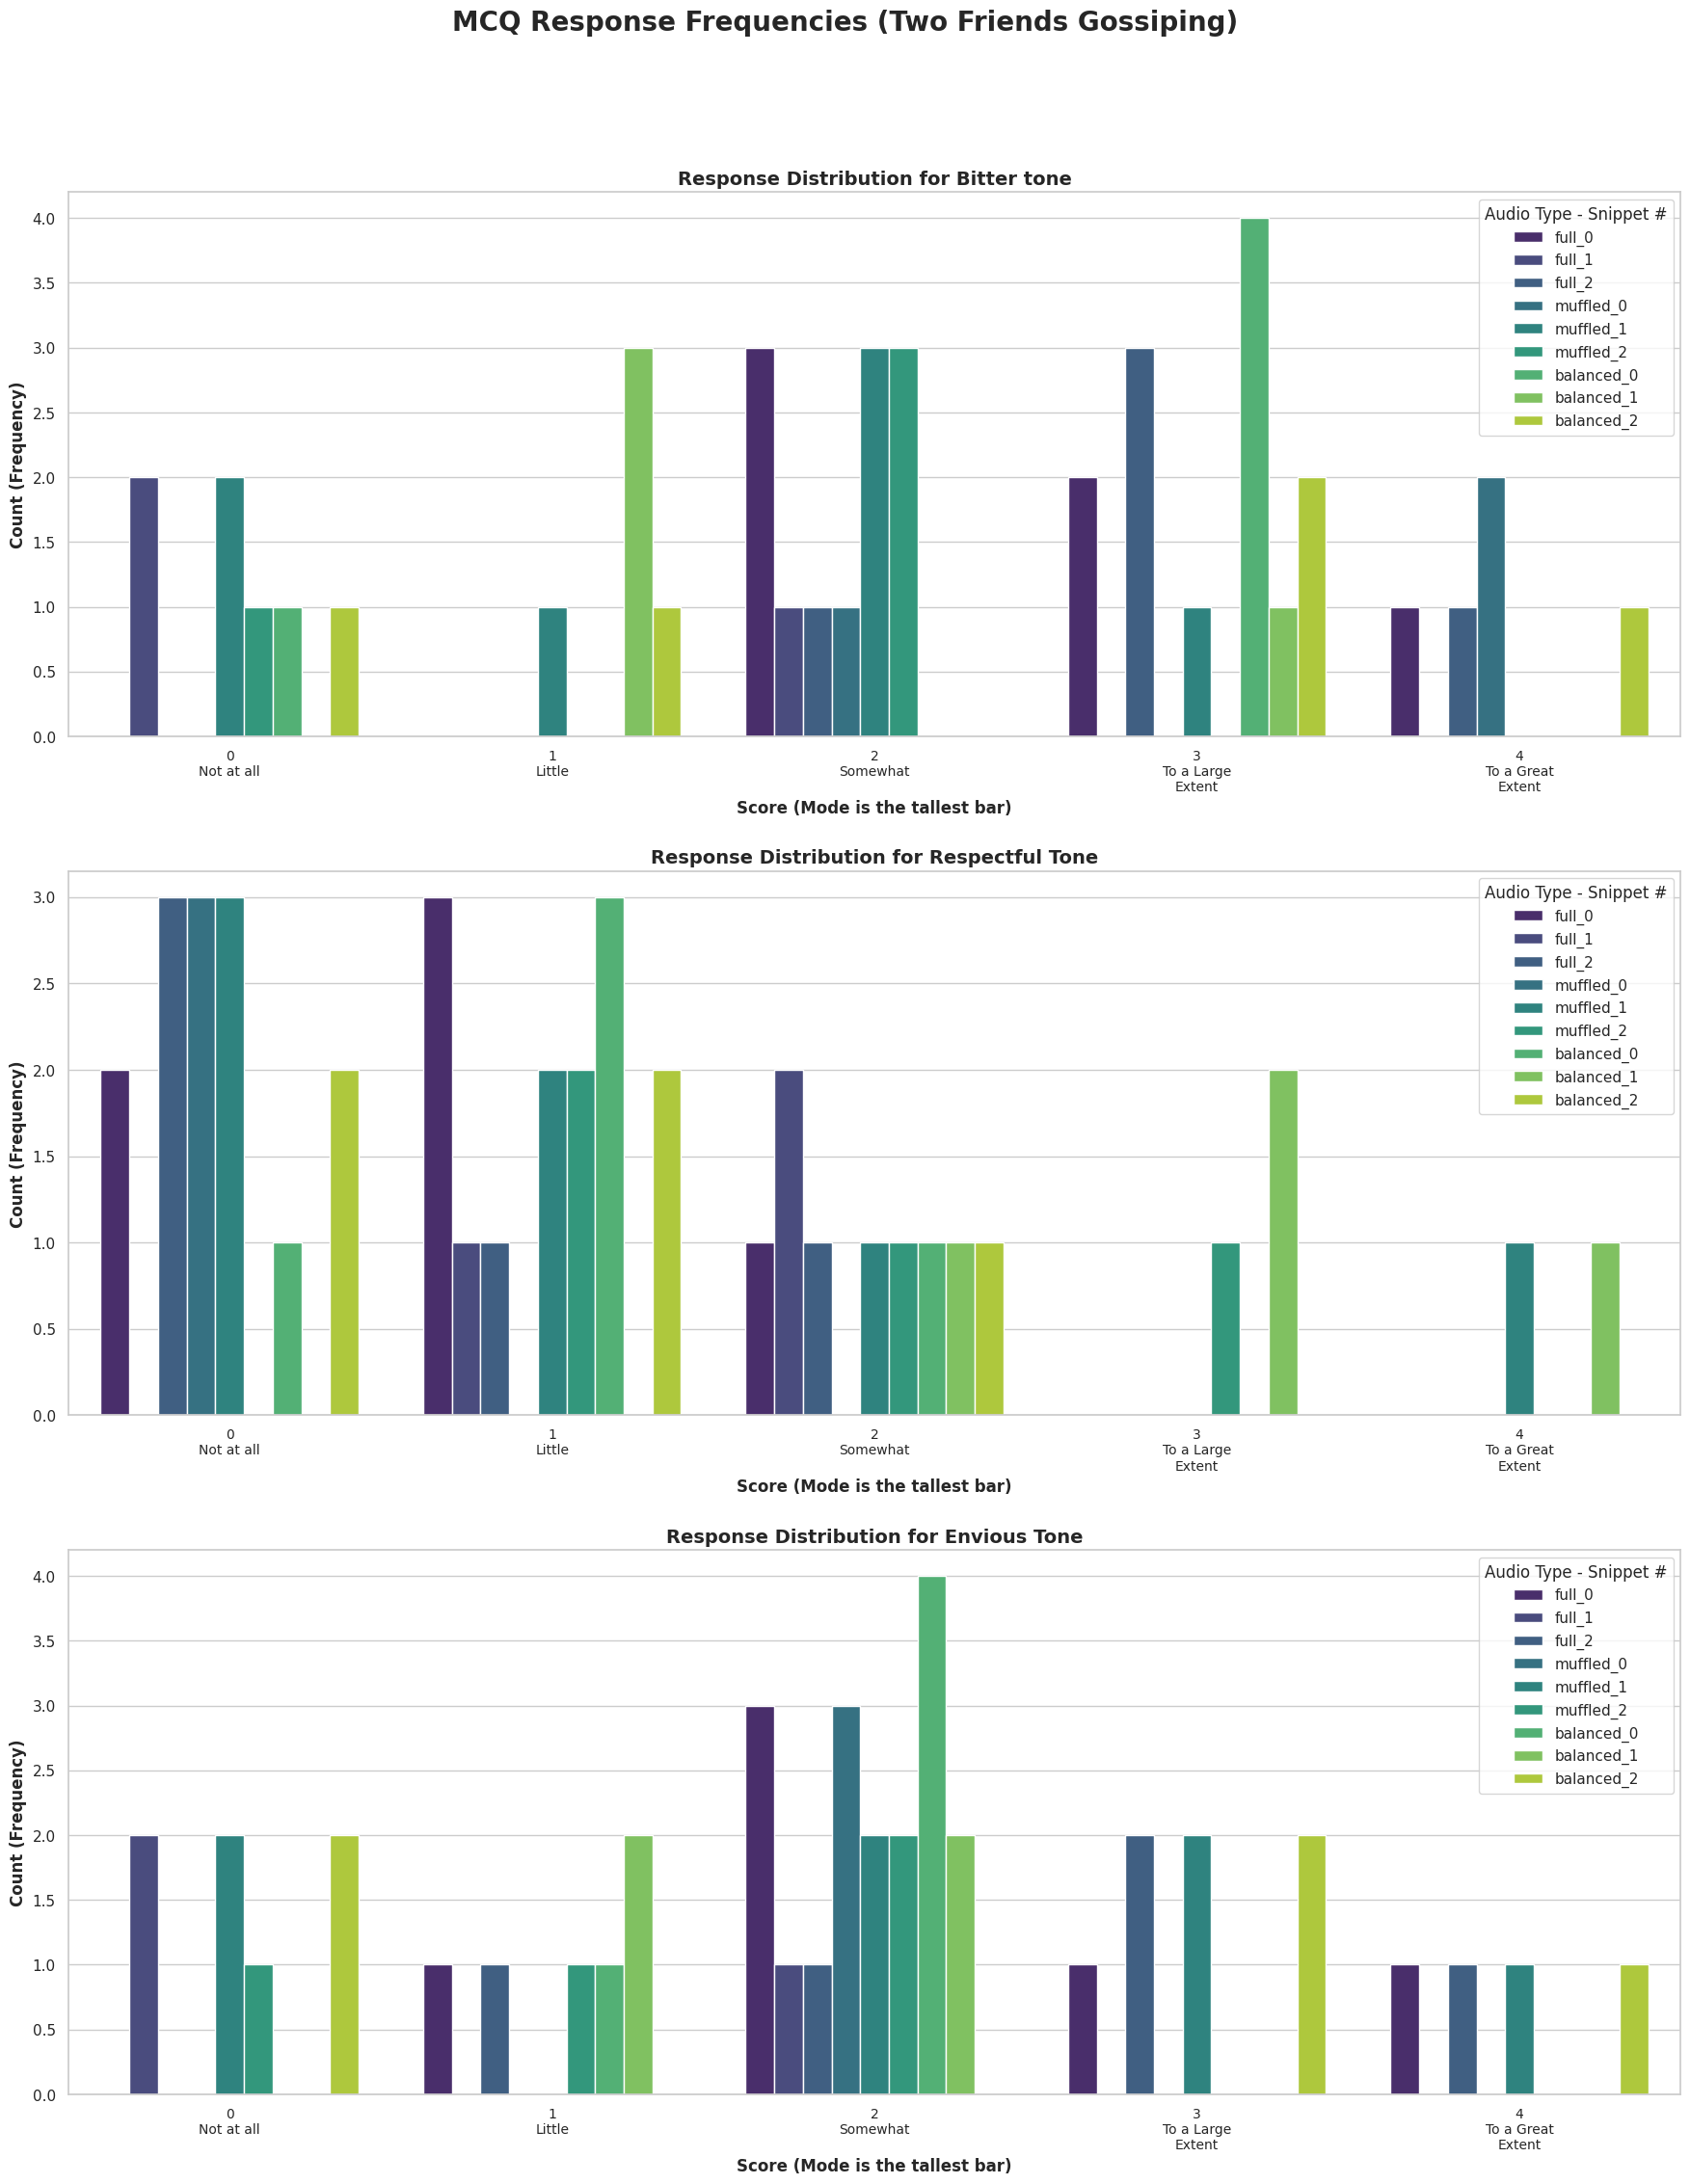


Generating Specific Snippet-Question Analysis Plots...


/tmp/ipython-input-2512964219.py:265: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2512964219.py:265: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2512964219.py:265: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


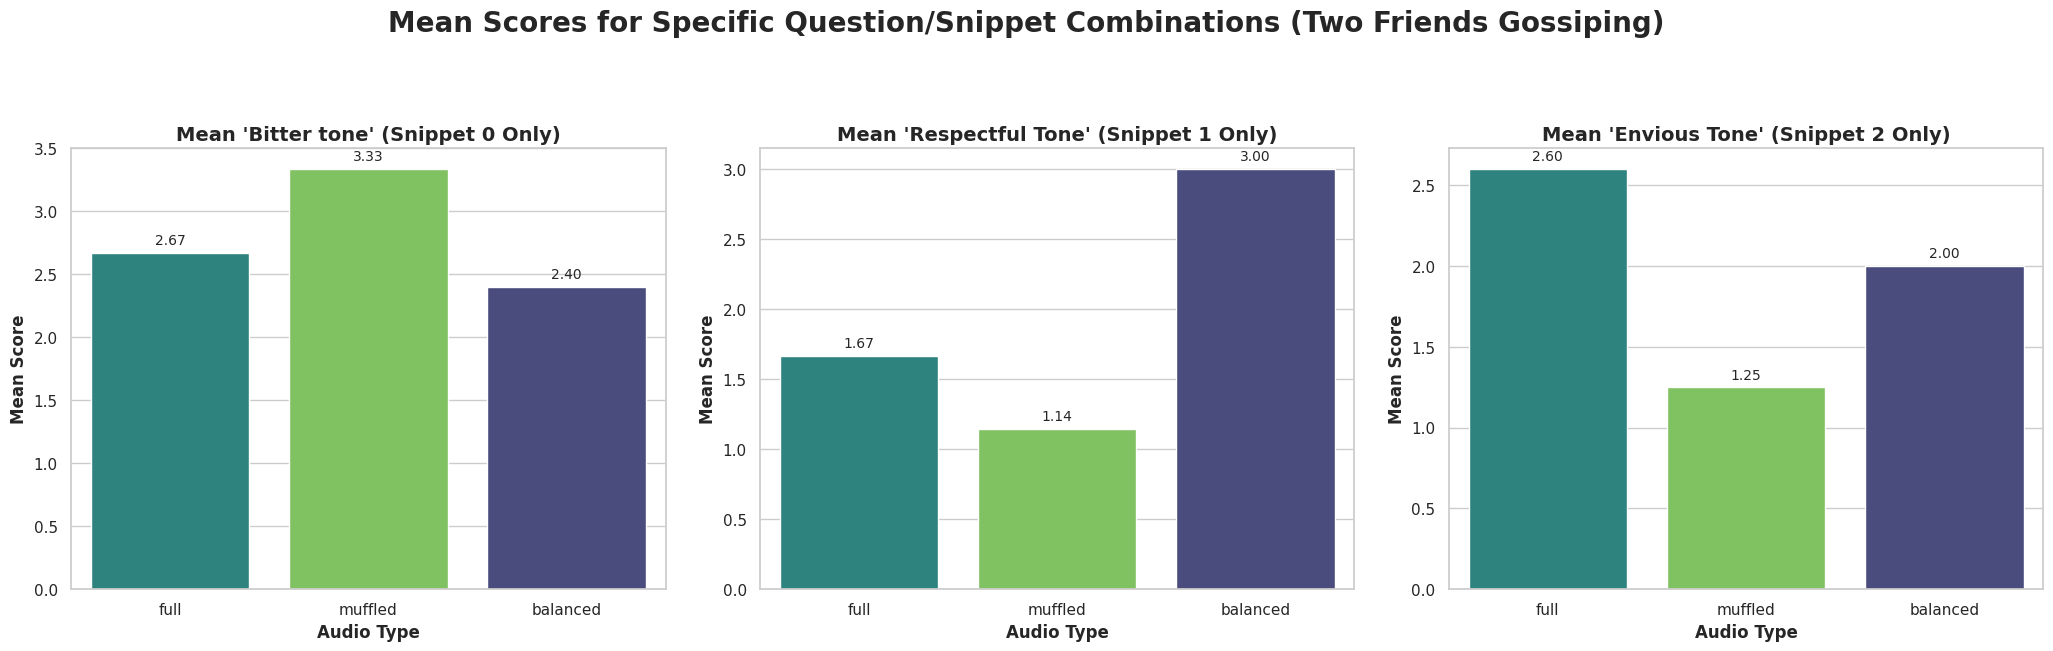


'Two Friends Gossiping' MCQ analysis complete.


In [ ]:
gossip_labels = {
    'mcq_q3': "Bitter tone",
    'mcq_q4': "Respectful Tone",
    'mcq_q5': "Envious Tone"
}

# 4. Run analysis for 'Two Friends Gossiping'
analyze_video_mcqs(
    video_title='Two Friends Gossiping',
    question_labels=gossip_labels,
    analysis_df=analysis_df
)

Preparing data for 'Taxi Driver Conversation'...
Found 42 rows for 'Taxi Driver Conversation'.
Successfully created new columns: ['mcq_q3', 'mcq_q4']
Proceeding with analysis on 42 valid rows.

Running Statistical Analysis for 'Taxi Driver Conversation'...

--- Analyzing: Fond tone ---

[Descriptive Statistics]
                                        mean       std  count
audio_type_assigned snippet_number                           
full                0               2.000000  0.707107      5
                    1               1.166667  1.169045      6
                    2               0.333333  0.577350      3
muffled             0               2.500000  1.290994      4
                    1               0.800000  0.836660      5
                    2               0.800000  0.836660      5
balanced            0               1.800000  1.095445      5
                    1               2.000000  0.000000      3
                    2               0.500000  0.547723      6

[Sta

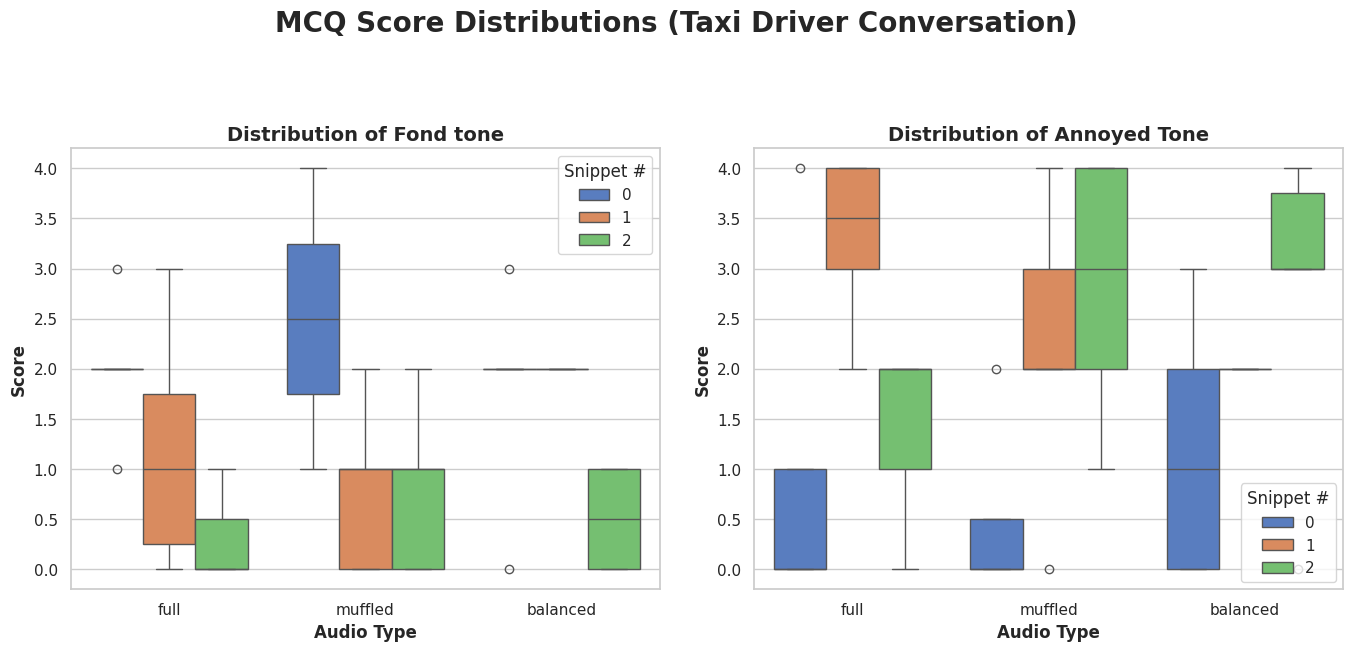


Generating Mean Score Plots...


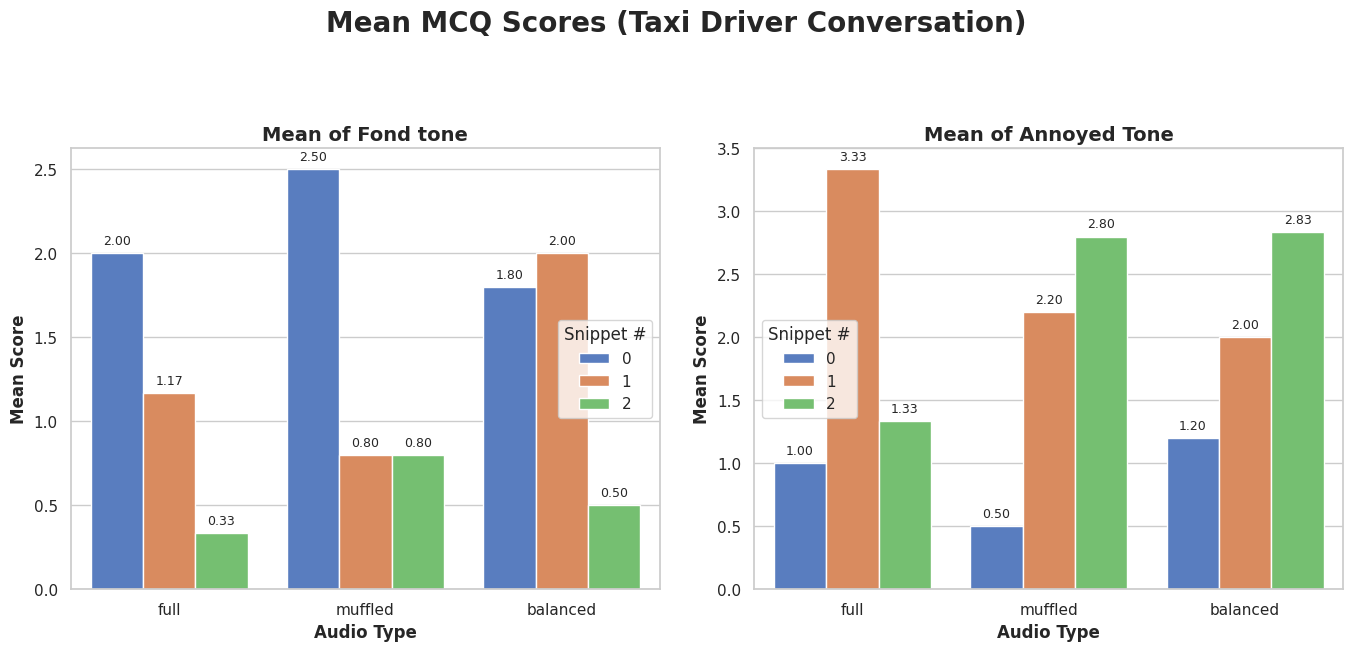


Generating Response Distribution Plots (Mode)...


/tmp/ipython-input-2512964219.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_tick_labels, fontsize=10)
/tmp/ipython-input-2512964219.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_tick_labels, fontsize=10)


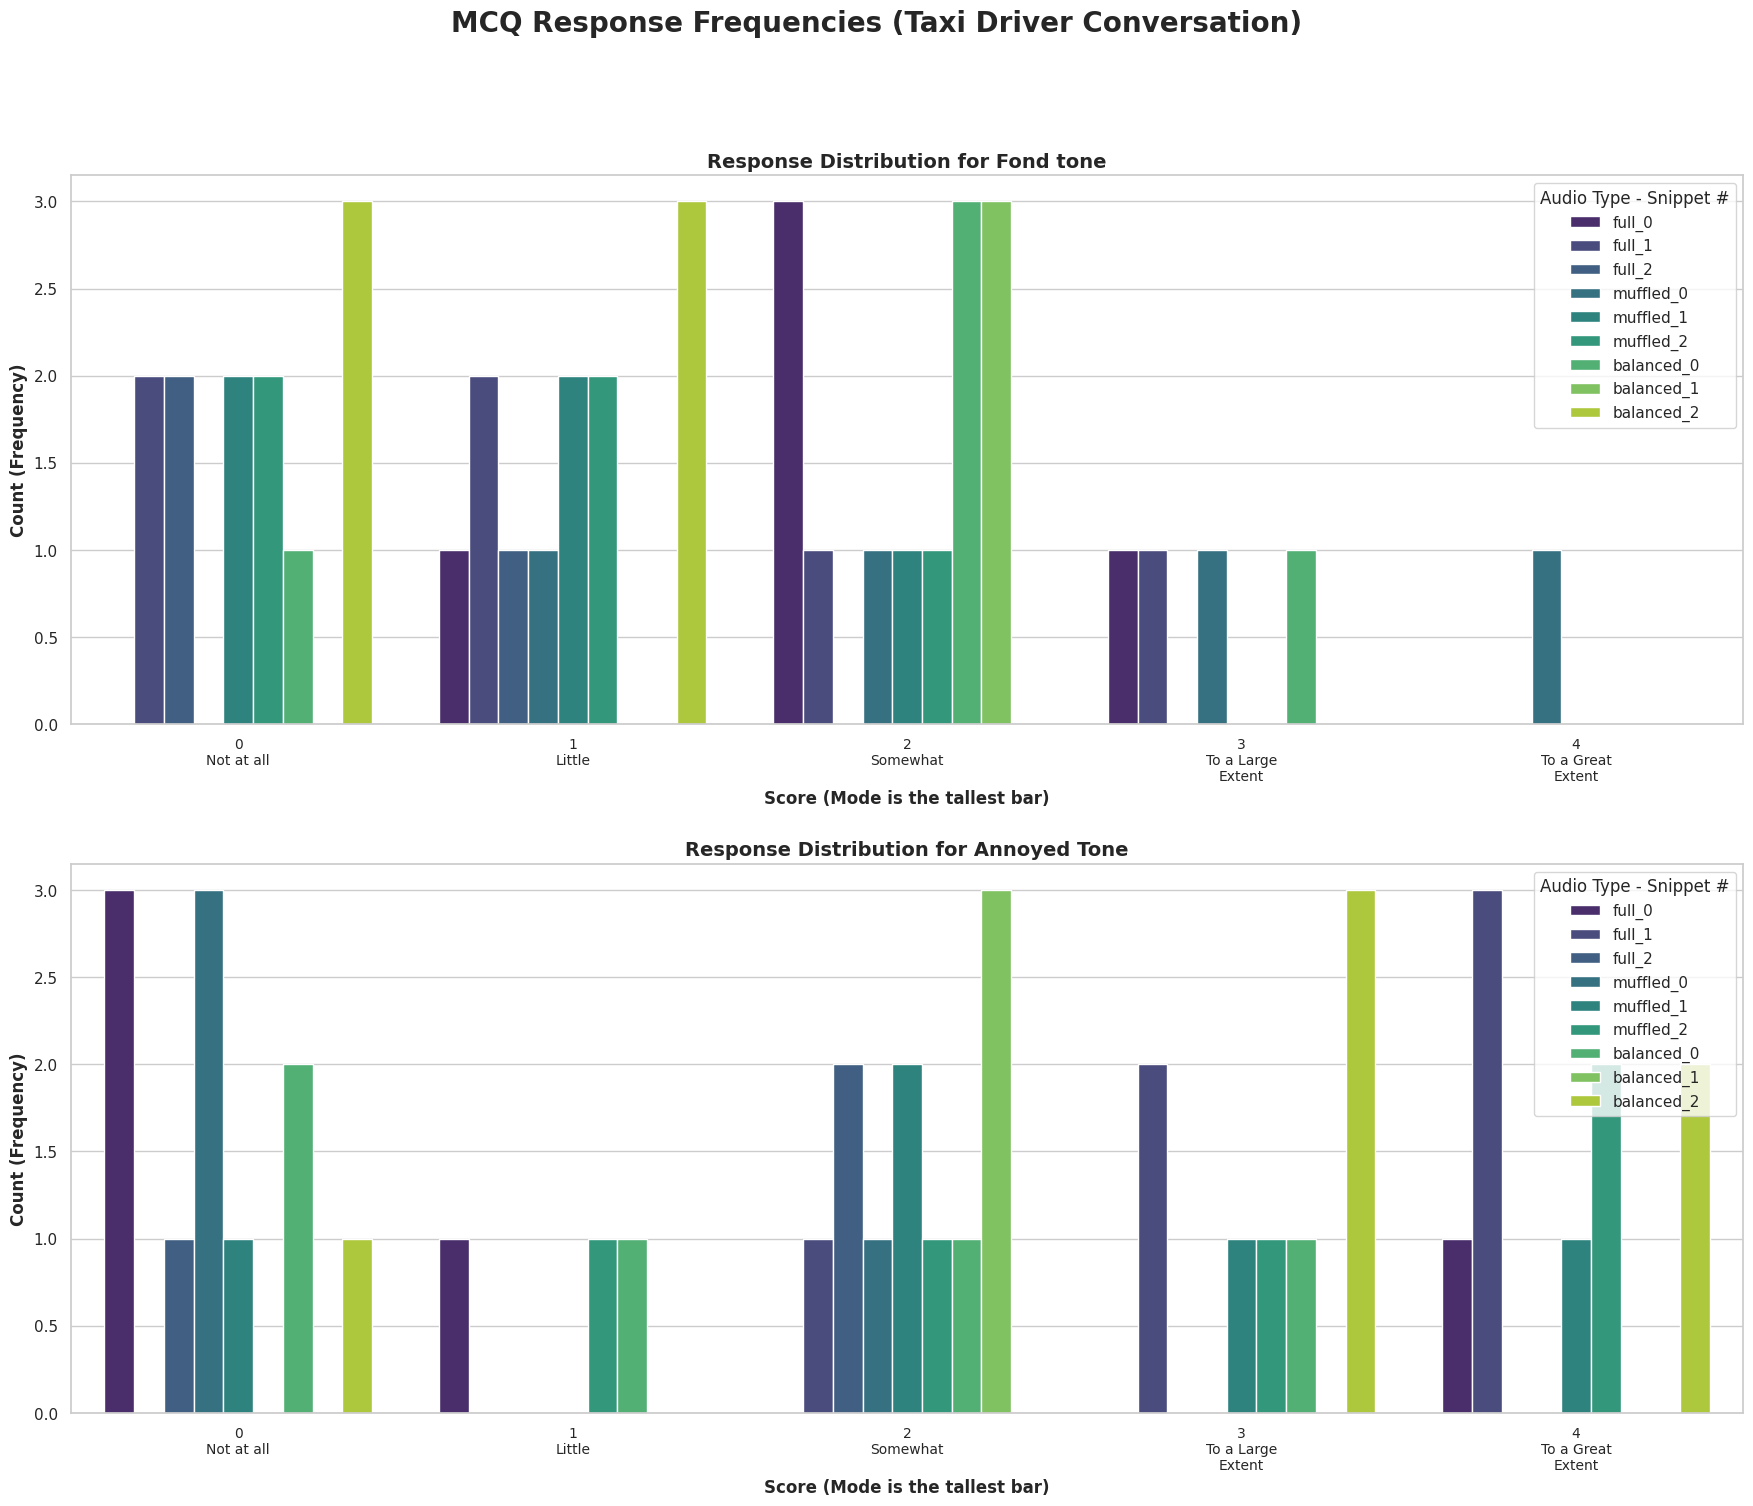


Generating Specific Snippet-Question Analysis Plots...


/tmp/ipython-input-2512964219.py:265: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2512964219.py:265: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


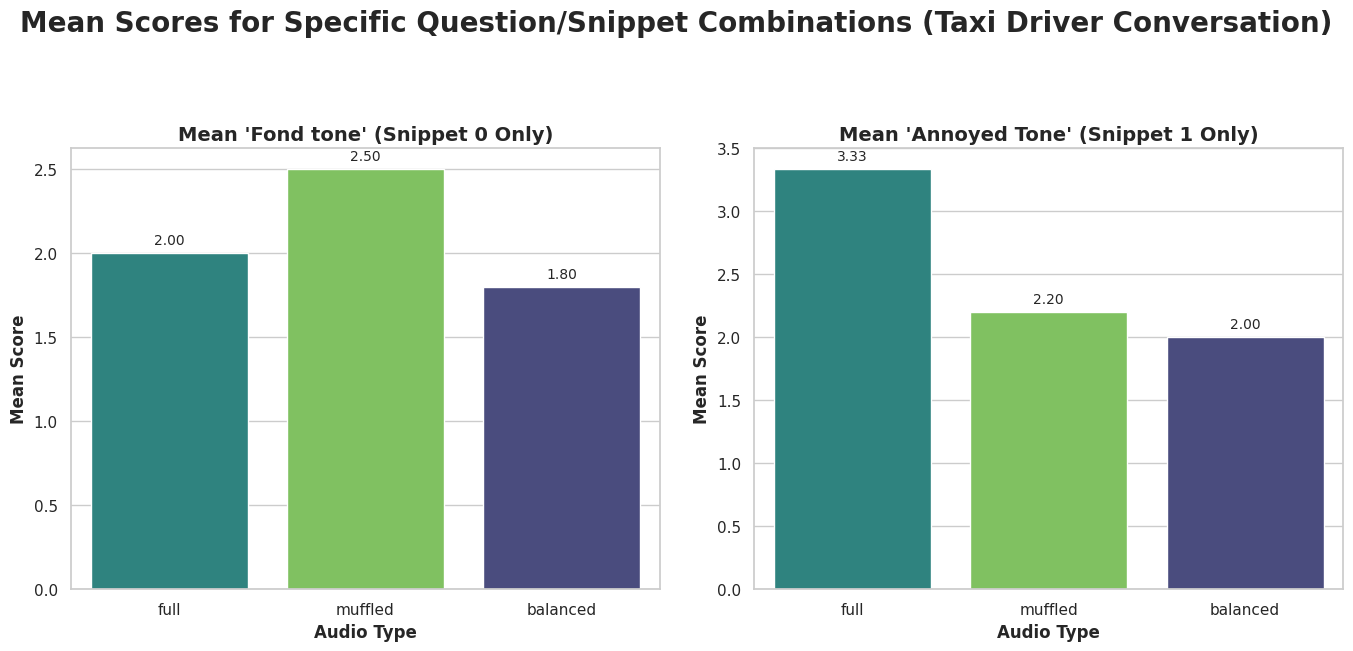


'Taxi Driver Conversation' MCQ analysis complete.


In [ ]:
taxi_labels = {
    'mcq_q3': "Fond tone",
    'mcq_q4': "Annoyed Tone",
}

# 4. Run analysis for 'Two Friends Gossiping'
analyze_video_mcqs(
    video_title='Taxi Driver Conversation',
    question_labels=taxi_labels,
    analysis_df=analysis_df
)

Preparing data for 'A Night Out'...
Found 42 rows for 'A Night Out'.
Successfully created new columns: ['mcq_q3', 'mcq_q4', 'mcq_q5']
Proceeding with analysis on 42 valid rows.

Running Statistical Analysis for 'A Night Out'...

--- Analyzing: Happy tone ---

[Descriptive Statistics]
                                        mean       std  count
audio_type_assigned snippet_number                           
full                0               2.166667  0.752773      6
                    1               0.500000  0.577350      4
                    2               0.250000  0.500000      4
muffled             0               1.333333  1.527525      3
                    1               0.833333  0.752773      6
                    2               0.600000  0.547723      5
balanced            0               3.600000  0.547723      5
                    1               1.000000  0.816497      4
                    2               0.000000  0.000000      5

[Statistical Tests]
One-Way ANOV

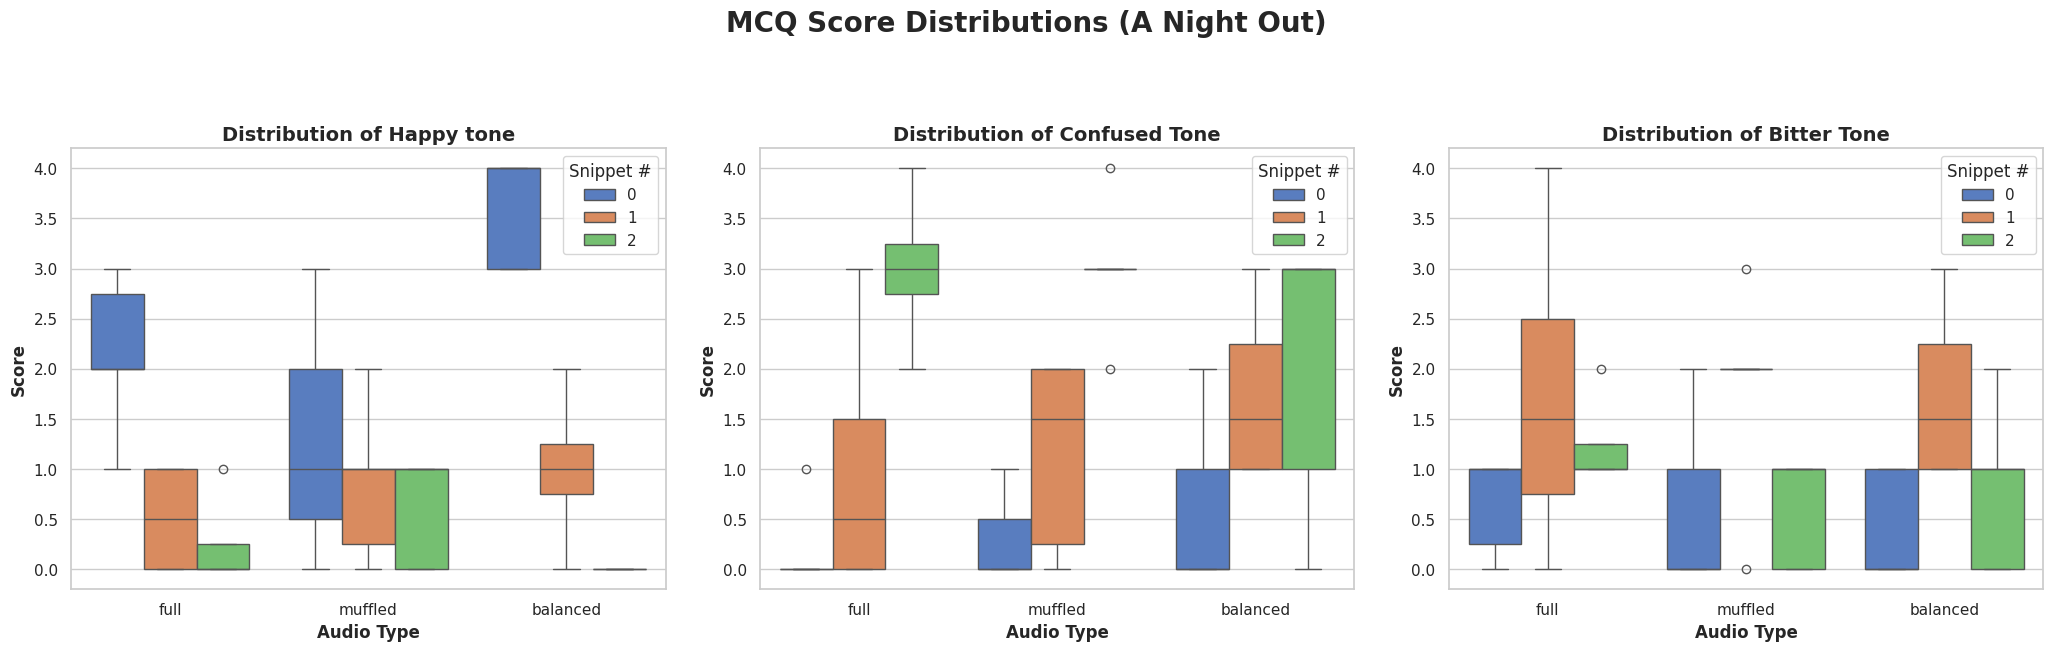


Generating Mean Score Plots...


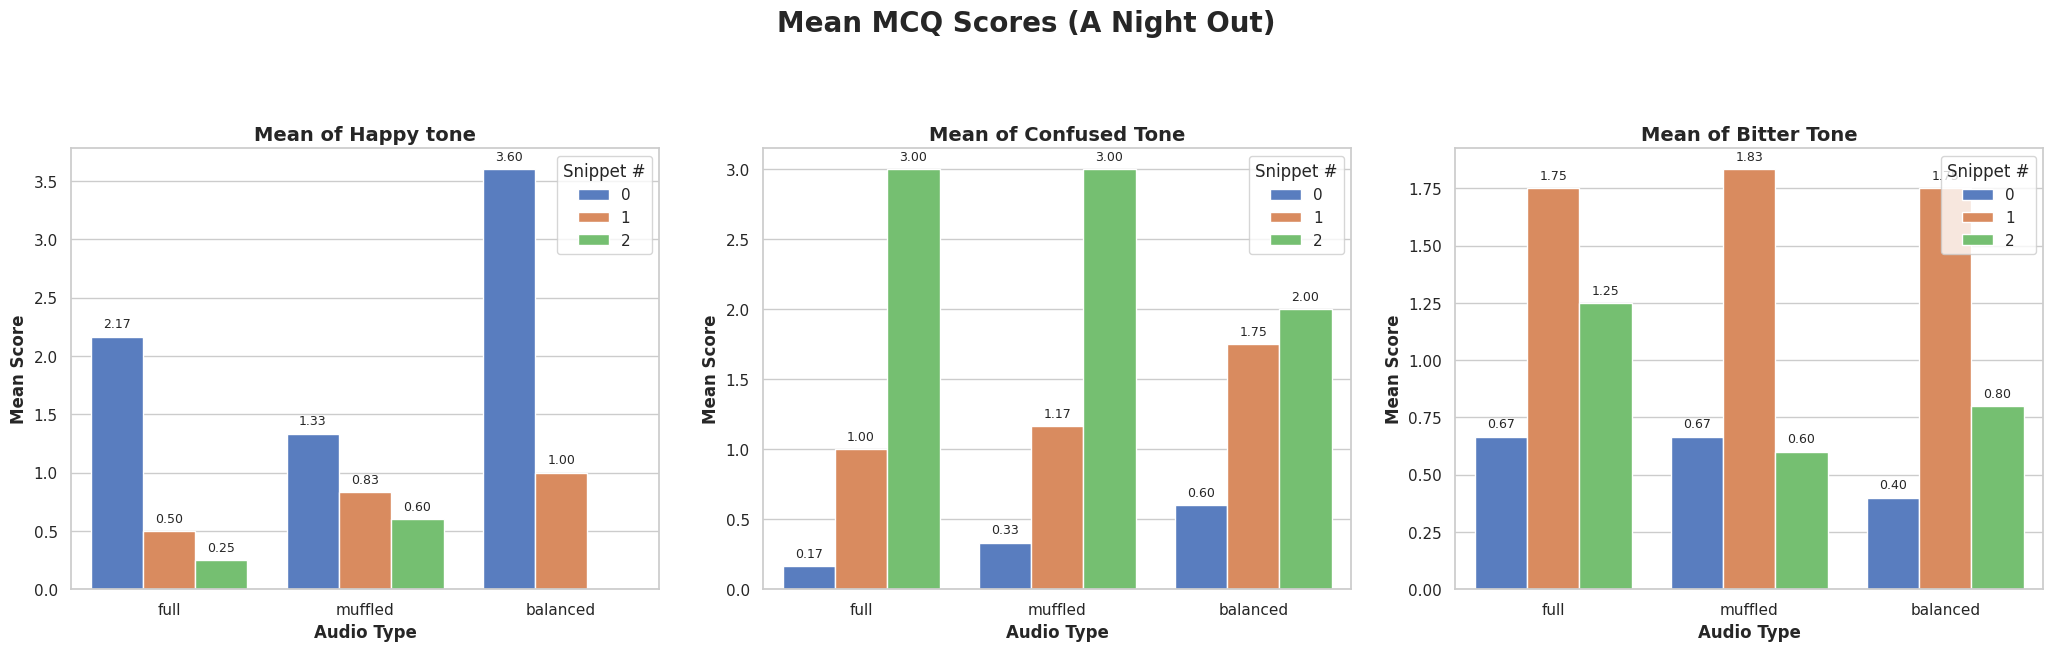


Generating Response Distribution Plots (Mode)...


/tmp/ipython-input-2512964219.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_tick_labels, fontsize=10)
/tmp/ipython-input-2512964219.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_tick_labels, fontsize=10)
/tmp/ipython-input-2512964219.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_tick_labels, fontsize=10)


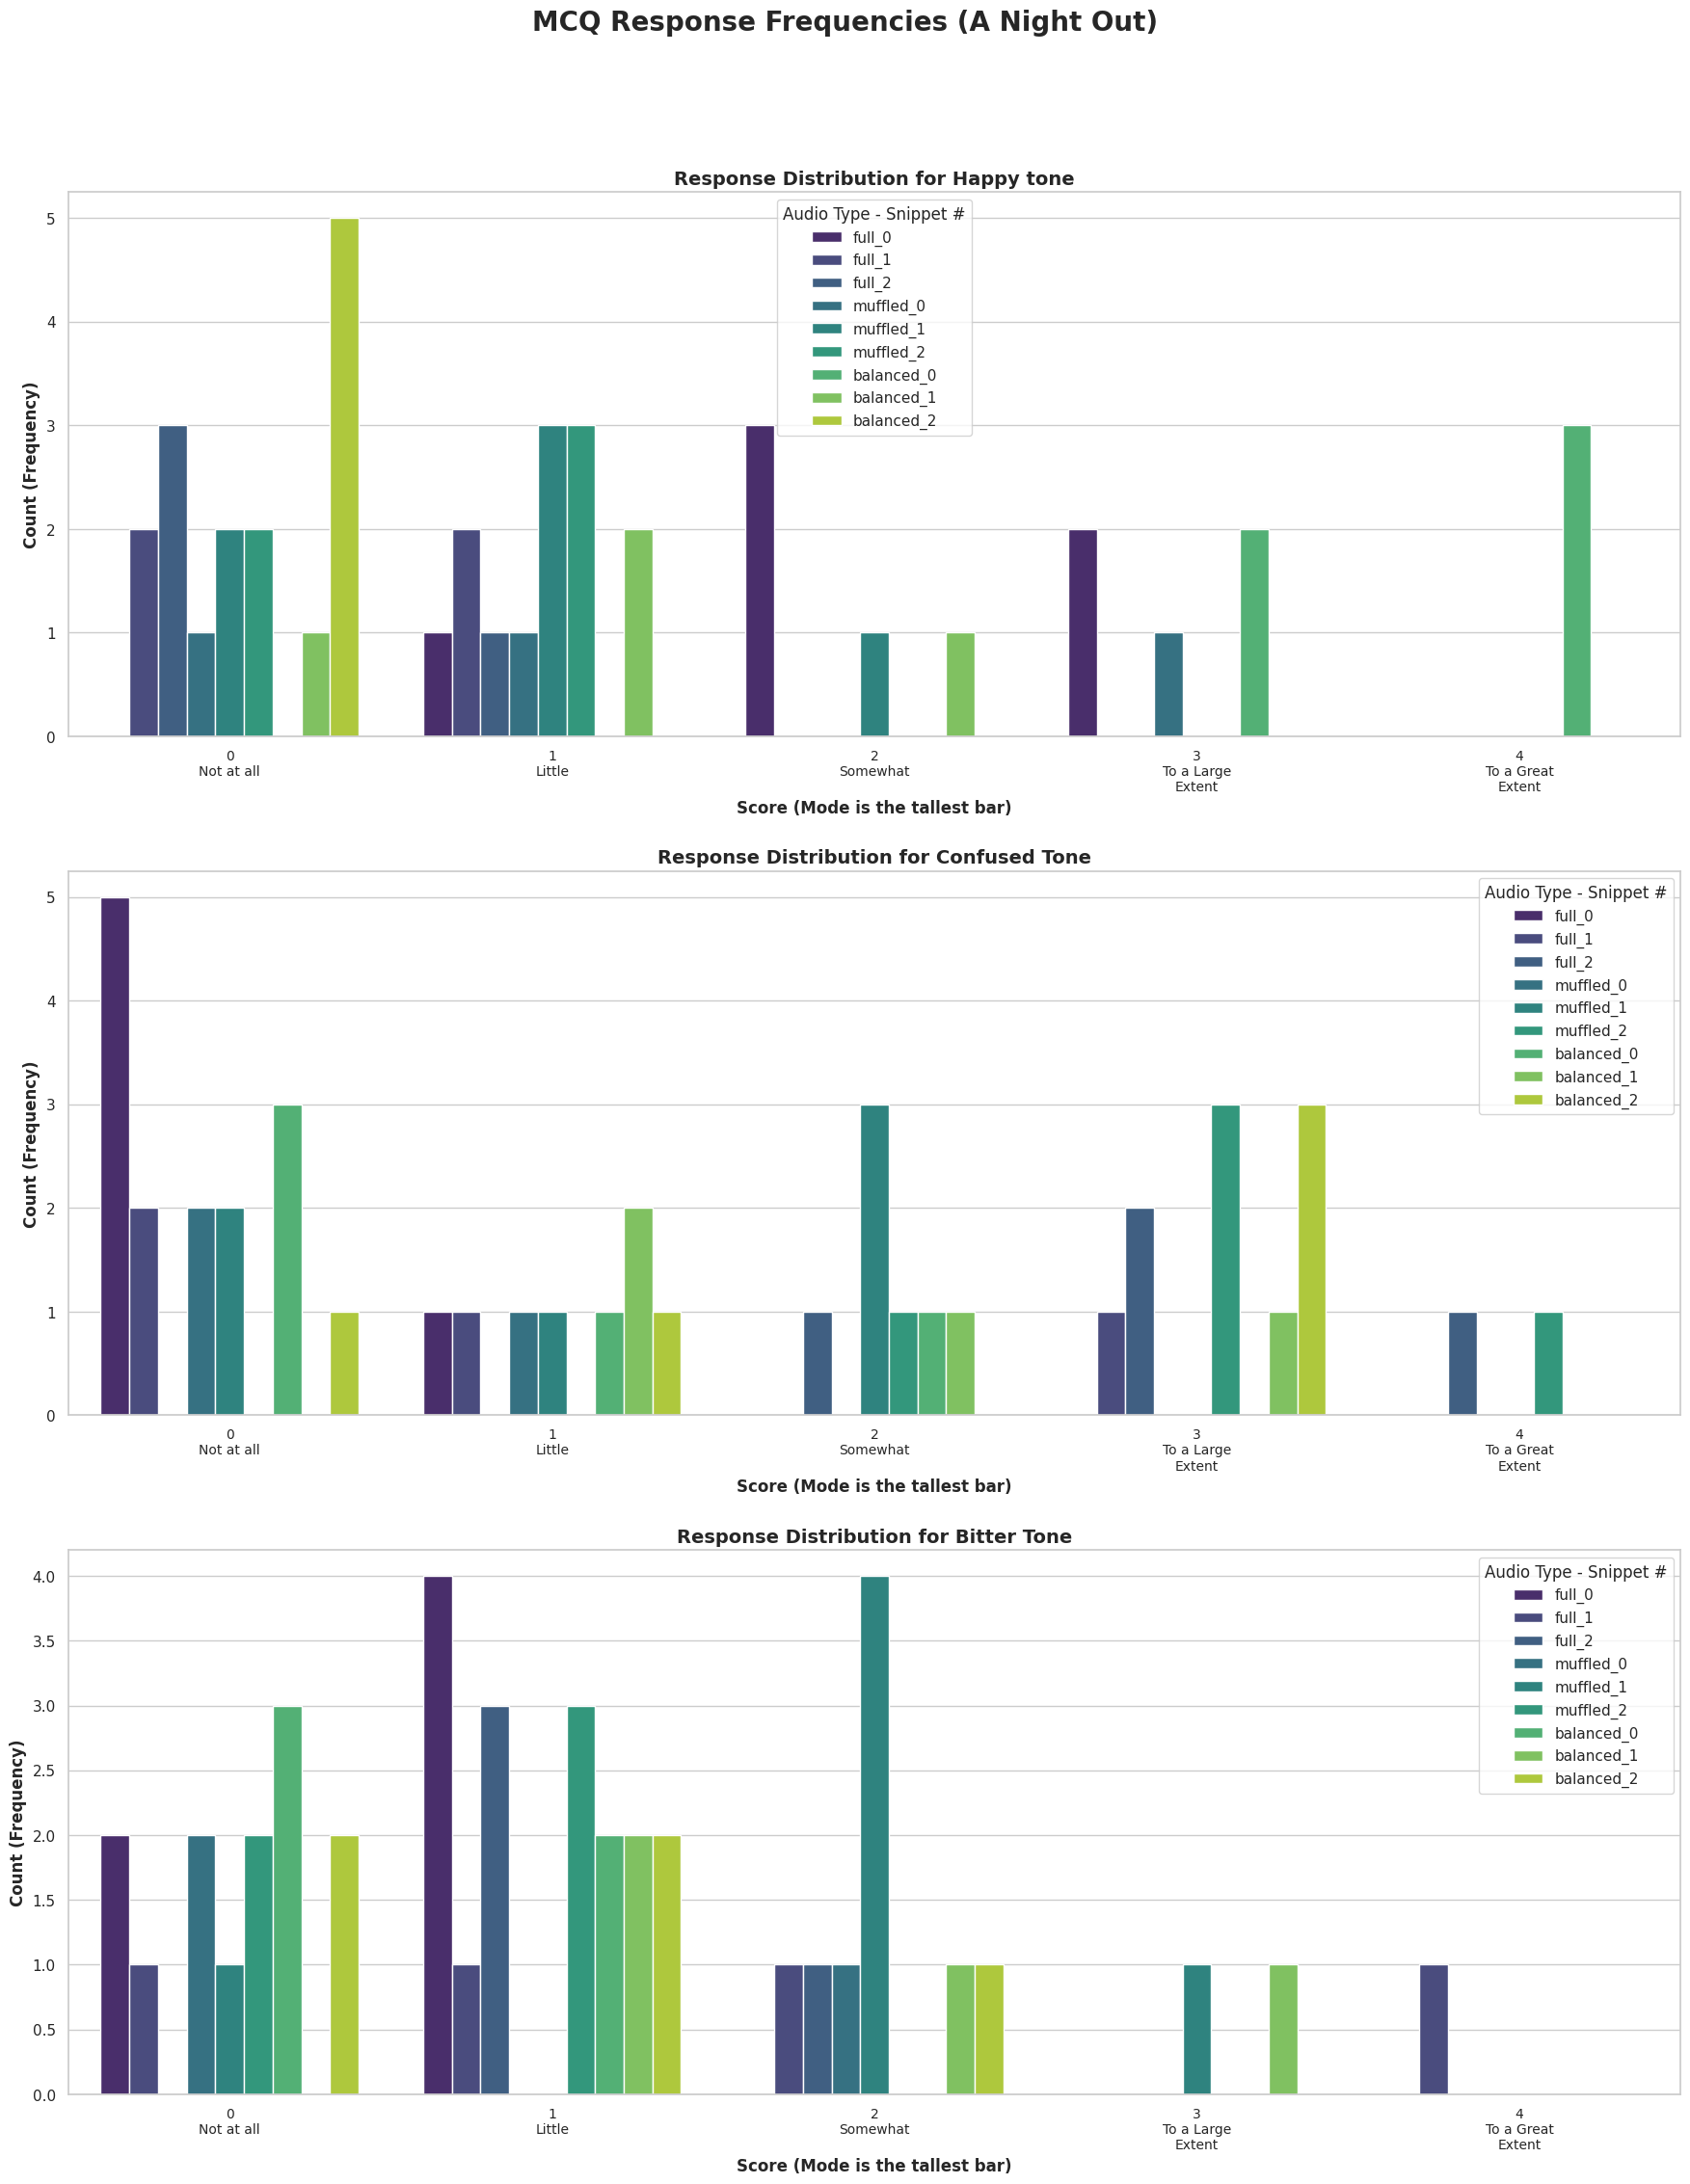


Generating Specific Snippet-Question Analysis Plots...


/tmp/ipython-input-2512964219.py:265: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2512964219.py:265: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2512964219.py:265: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


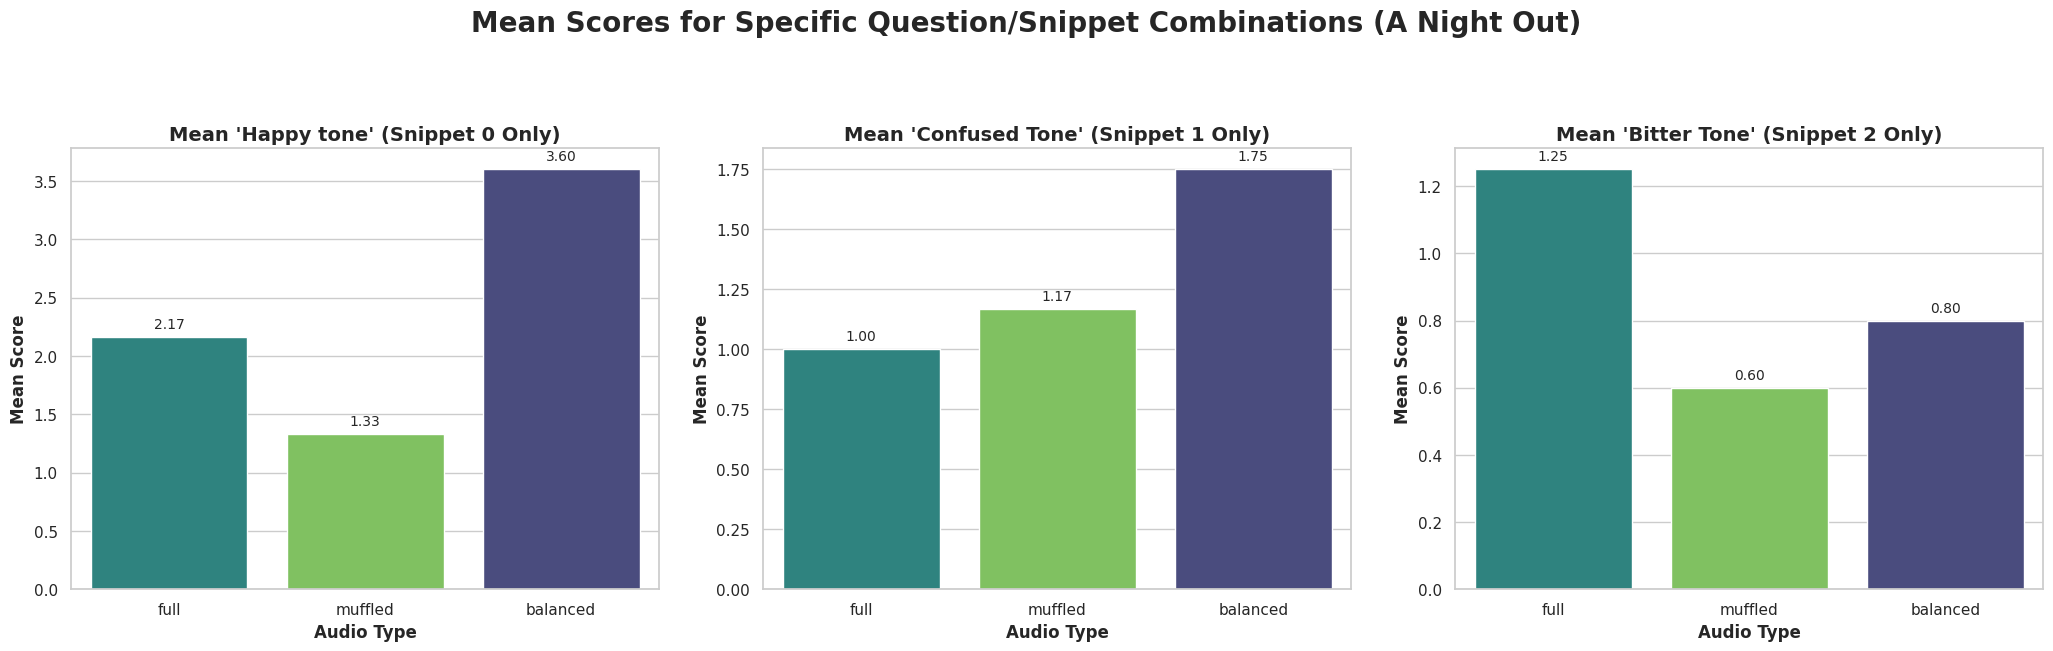


'A Night Out' MCQ analysis complete.


In [ ]:
night_labels = {
    'mcq_q3': "Happy tone",
    'mcq_q4': "Confused Tone",
    "mcq_q5": "Bitter Tone"
}

# 4. Run analysis for 'Two Friends Gossiping'
analyze_video_mcqs(
    video_title='A Night Out',
    question_labels=night_labels,
    analysis_df=analysis_df
)

Preparing data for 'The Passion Project'...
Found 42 rows for 'The Passion Project'.
Successfully created new columns: ['mcq_q3', 'mcq_q4', 'mcq_q5']
Proceeding with analysis on 42 valid rows.

Running Statistical Analysis for 'The Passion Project'...

--- Analyzing: Excited tone ---

[Descriptive Statistics]
                                        mean       std  count
audio_type_assigned snippet_number                           
full                0               2.571429  1.397276      7
                    1               0.600000  0.894427      5
                    2               2.500000  0.707107      2
muffled             0               4.000000  0.000000      2
                    1               0.500000  0.547723      6
                    2               1.833333  1.471960      6
balanced            0               3.000000  1.224745      5
                    1               0.333333  0.577350      3
                    2               2.666667  0.816497      6

[Stati

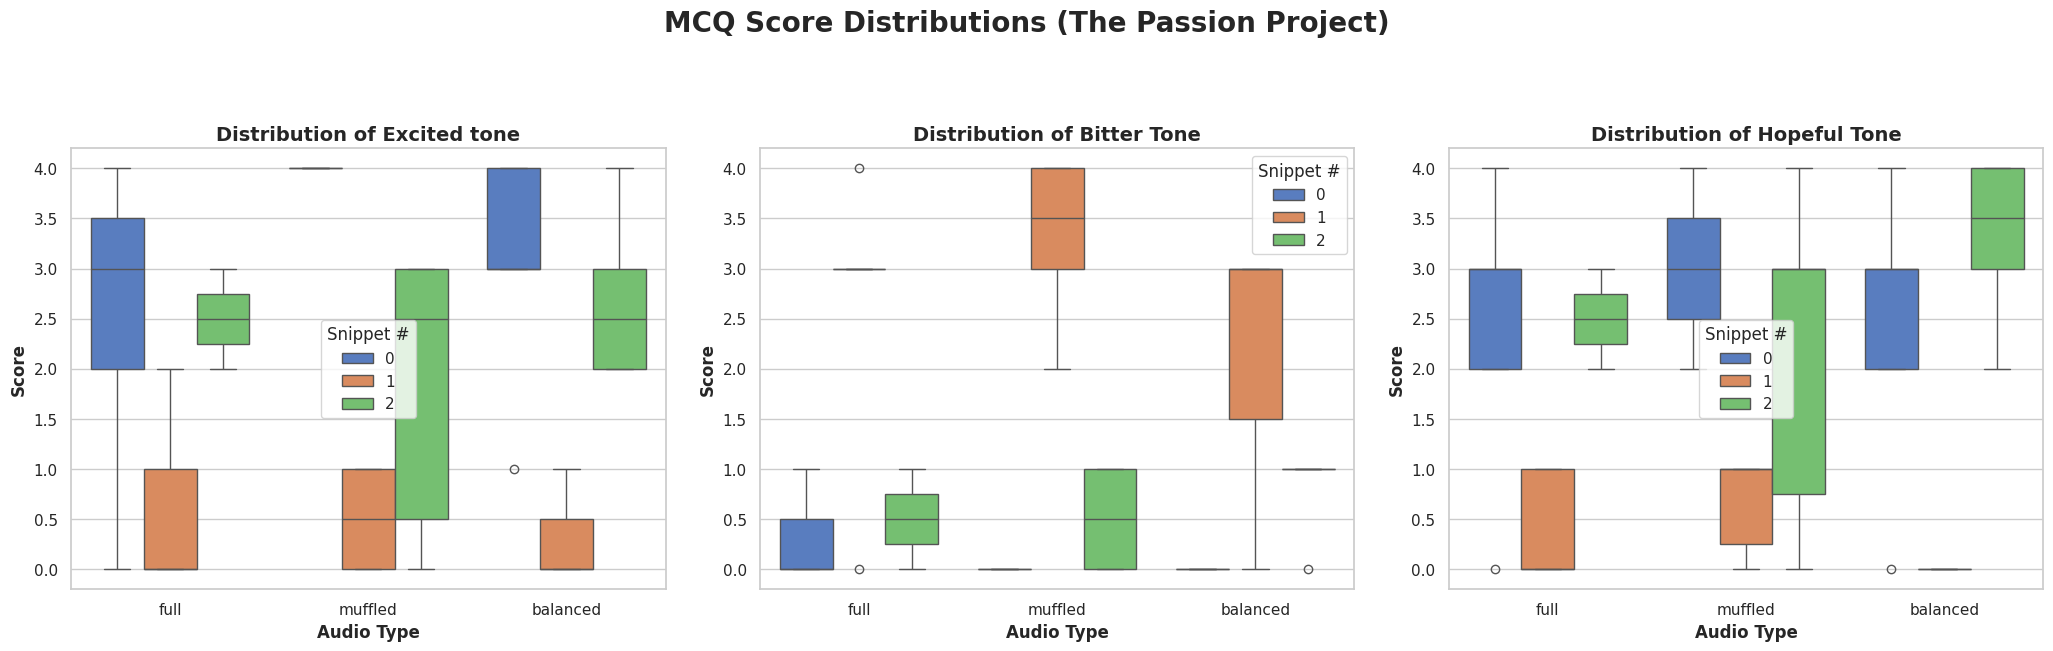


Generating Mean Score Plots...


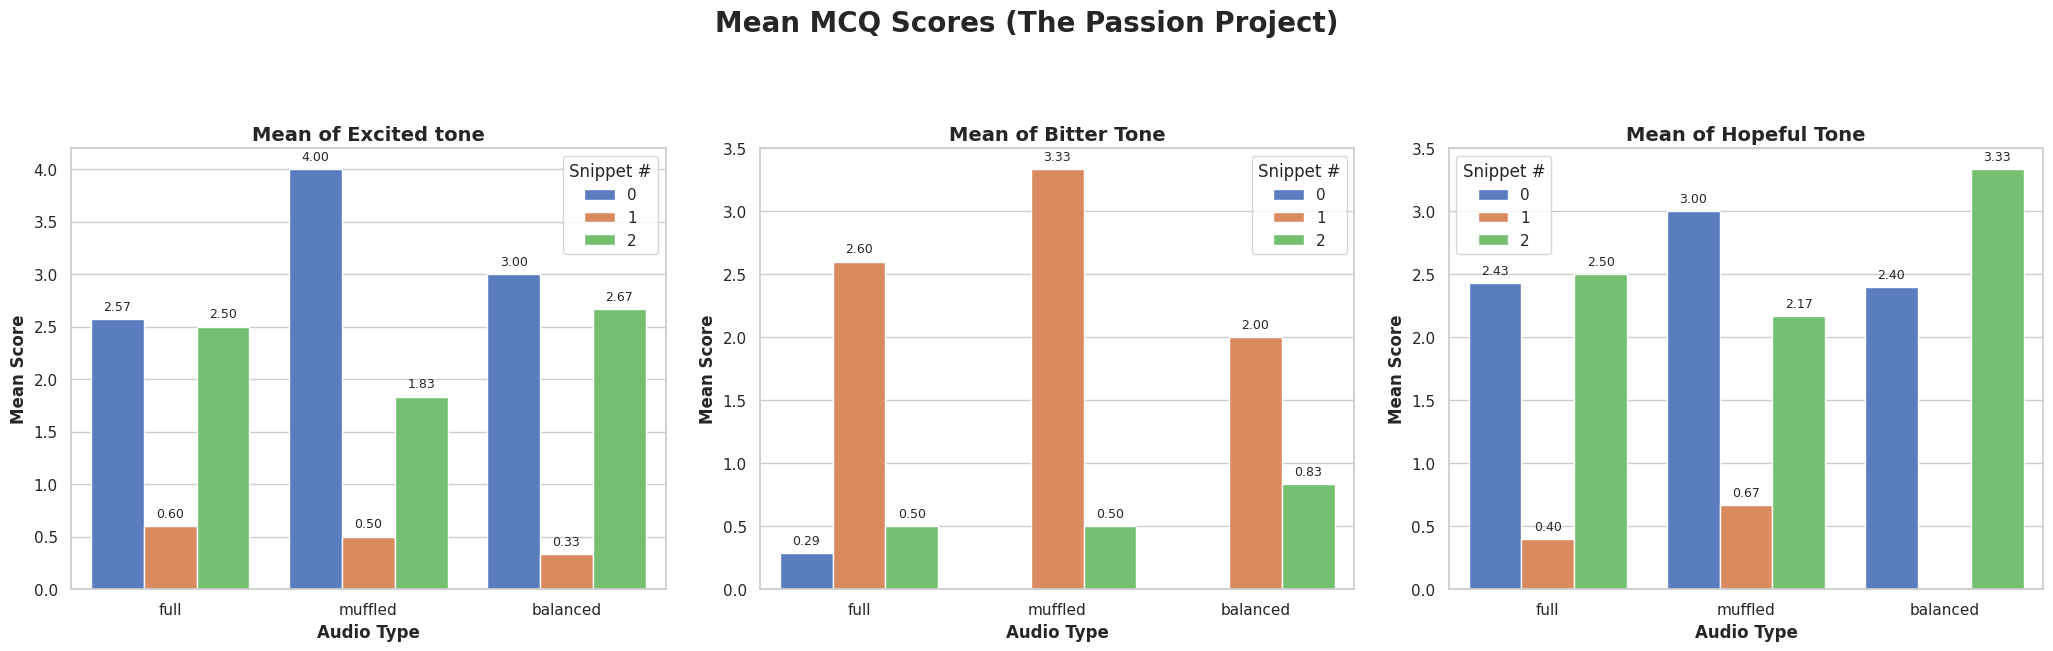


Generating Response Distribution Plots (Mode)...


/tmp/ipython-input-2512964219.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_tick_labels, fontsize=10)
/tmp/ipython-input-2512964219.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_tick_labels, fontsize=10)
/tmp/ipython-input-2512964219.py:233: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_tick_labels, fontsize=10)


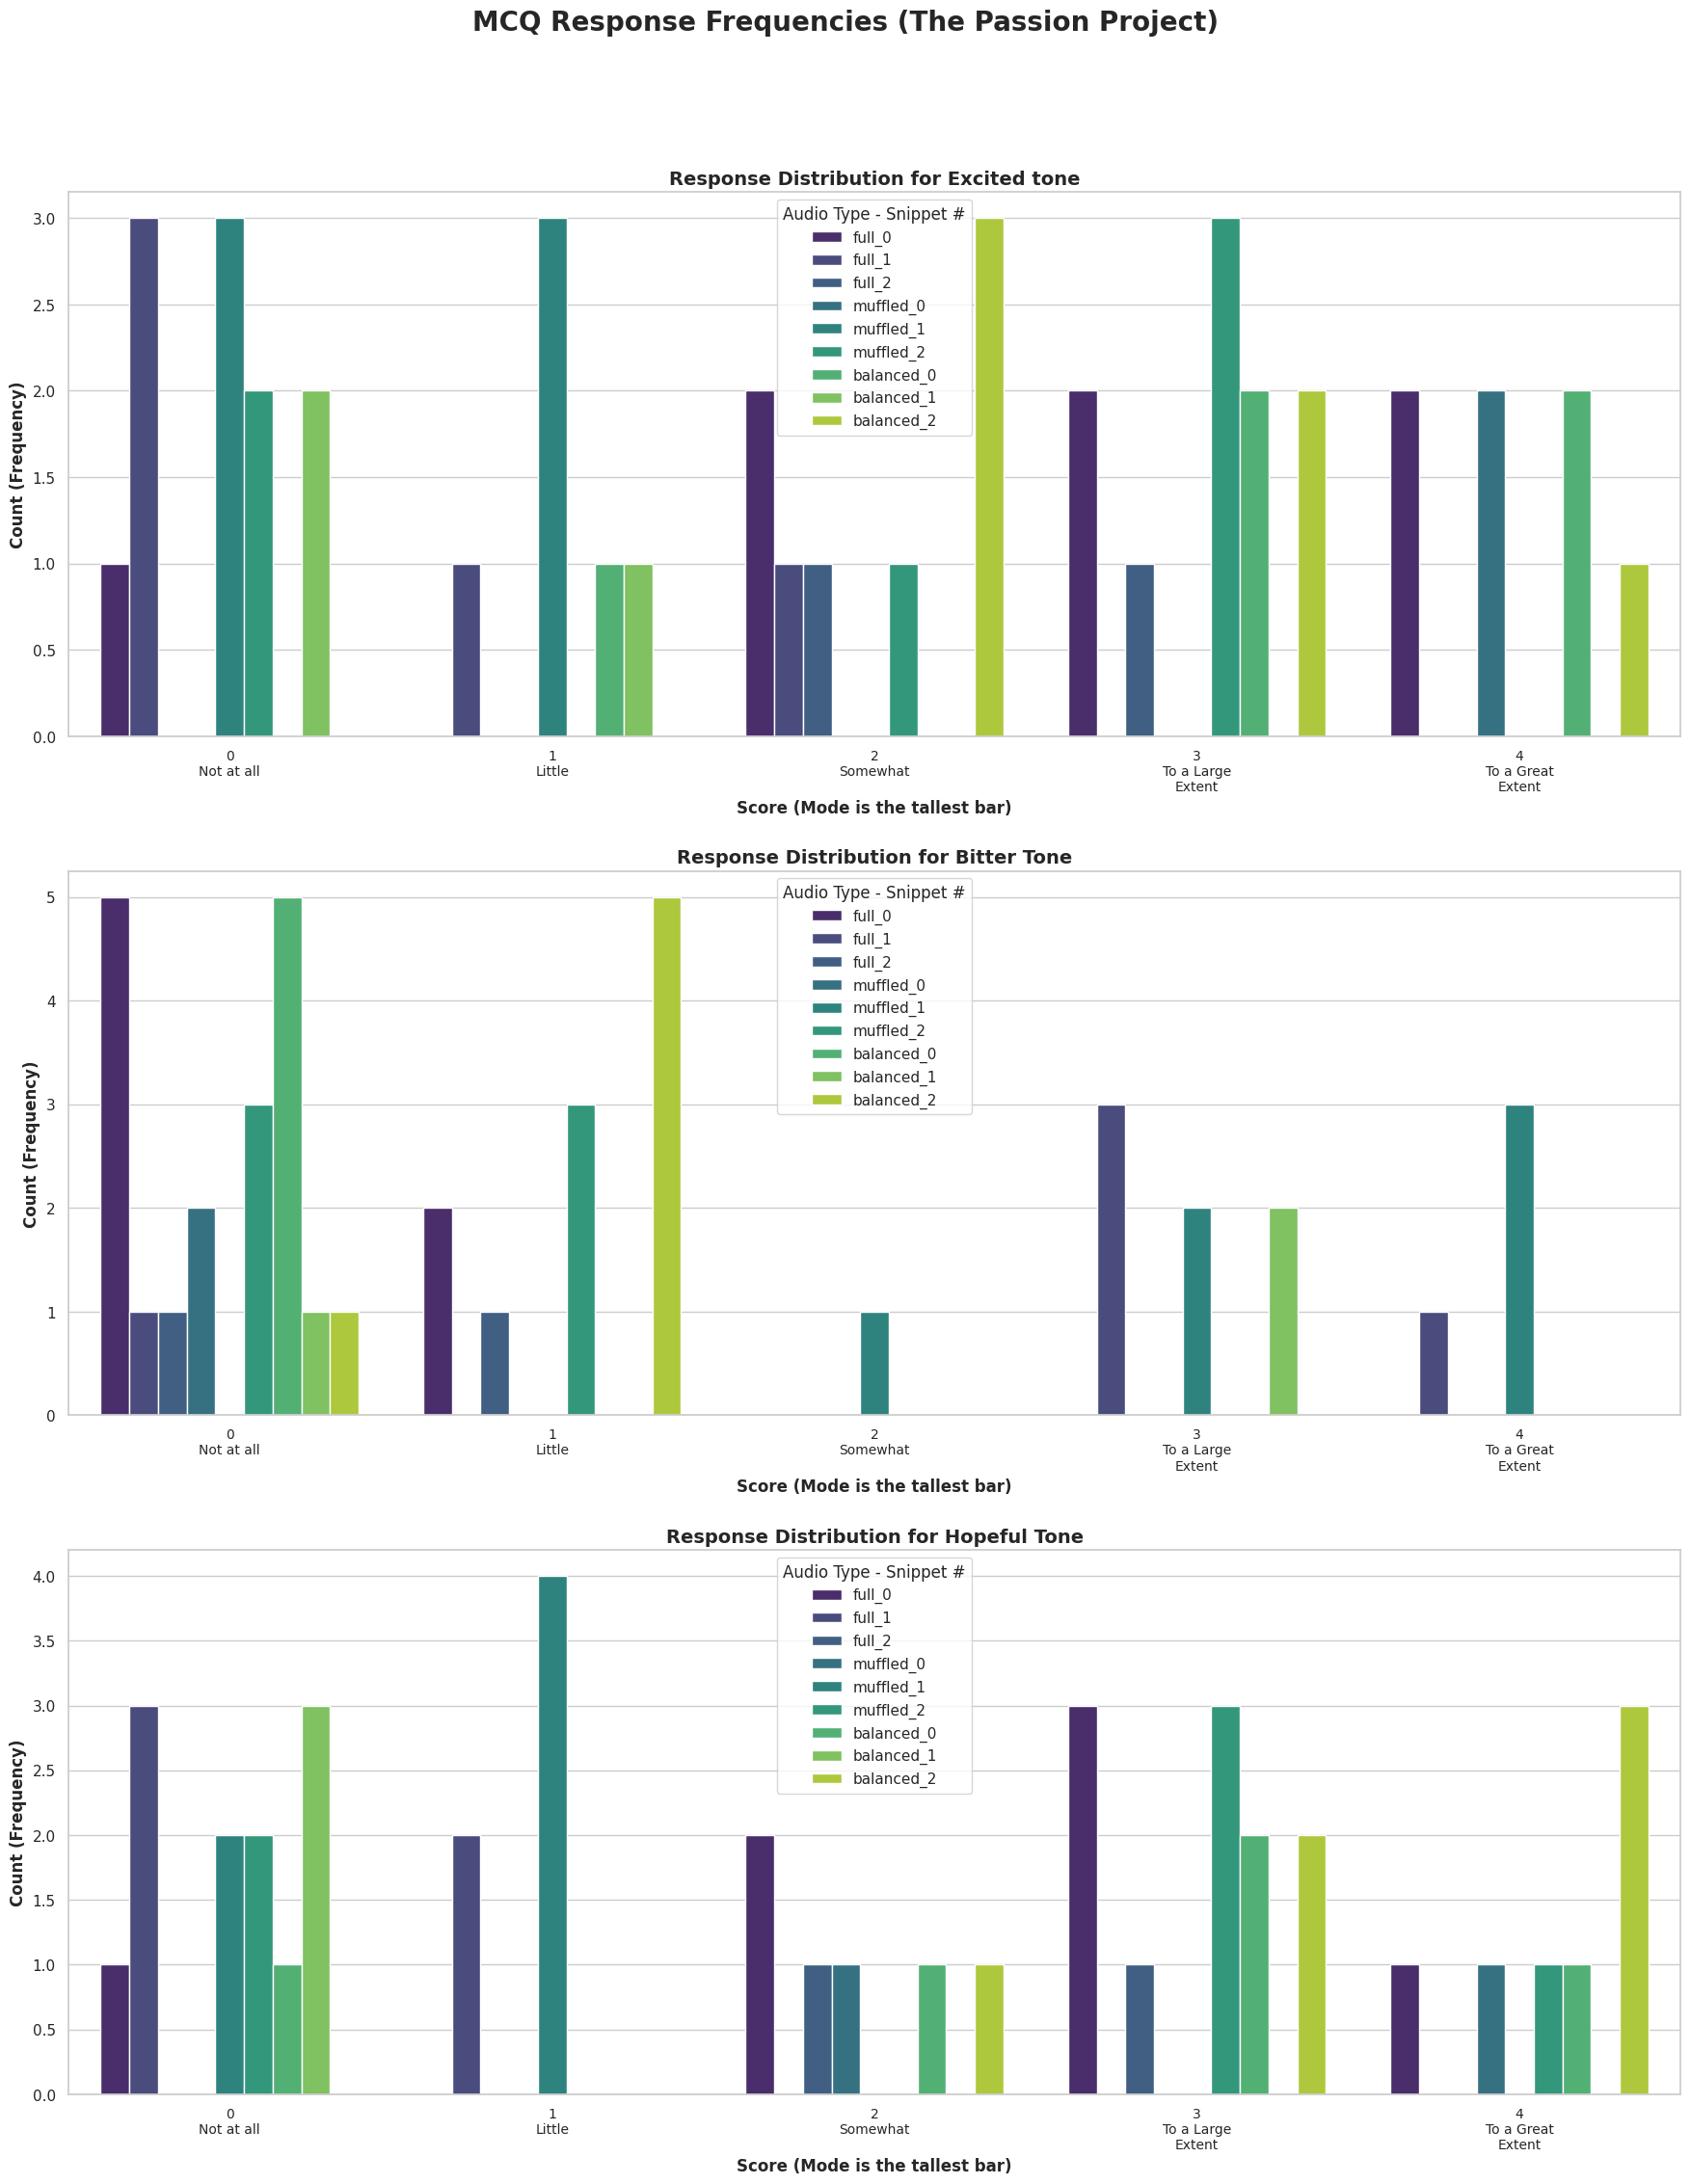


Generating Specific Snippet-Question Analysis Plots...


/tmp/ipython-input-2512964219.py:265: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2512964219.py:265: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2512964219.py:265: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


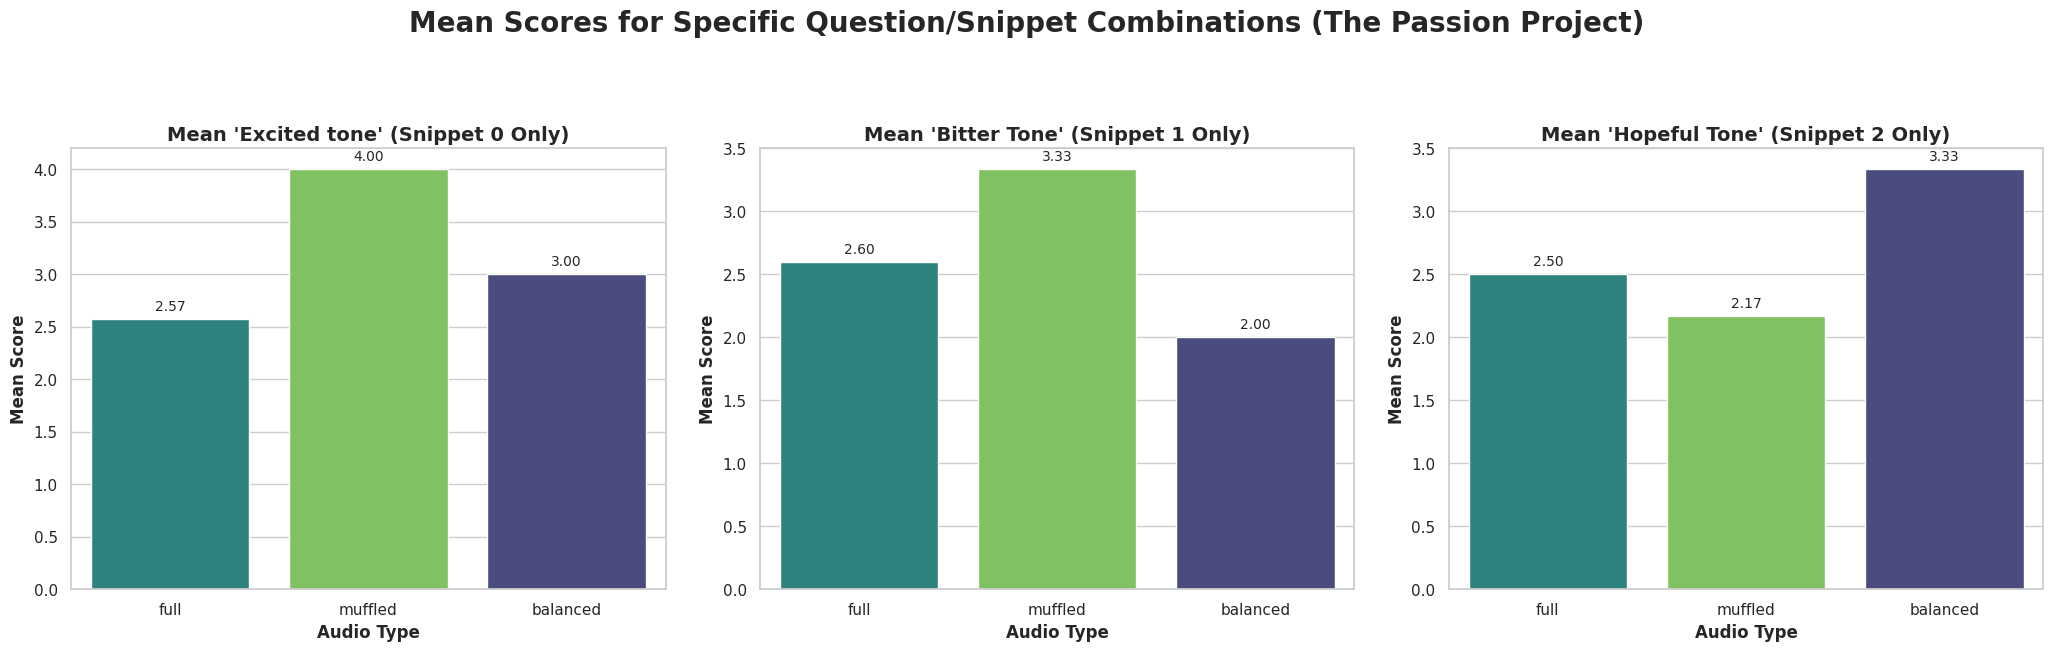


'The Passion Project' MCQ analysis complete.


In [ ]:
passion_labels = {
  'mcq_q3': "Excited tone",
  'mcq_q4': "Bitter Tone",
  'mcq_q5': "Hopeful Tone",
}

# 4. Run analysis for 'Two Friends Gossiping'
analyze_video_mcqs(
  video_title='The Passion Project',
  question_labels=passion_labels,
  analysis_df=analysis_df
)